In [1]:
##Uploading needed packages
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

Using TensorFlow backend.


In [2]:
#Downloading data from Keras
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 0us/step


In [3]:
x_train = x_train/127.5-1

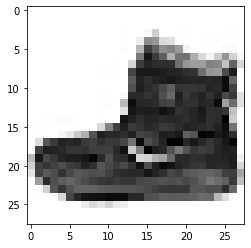

In [4]:
#dataset sample
plt.imshow(x_train[0], cmap='Greys')

In [7]:
#Keras package for trainig
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU

In [8]:
#Expending dataset dimansion: 3 dimensions
x_train = np.expand_dims(x_train, axis=3)

In [17]:
#Model: step1
def create_generator():
    model = Sequential()
    model.add(Dense(256, input_dim=100))
    model.add(LeakyReLU(0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(512))
    model.add(LeakyReLU(0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(1024))
    model.add(LeakyReLU(0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(np.prod((28, 28, 1)), activation='tanh'))
    model.add(Reshape((28, 28, 1)))
    model.summary()
    noise = Input(shape=(100,))
    img = model(noise)
    return Model(noise, img)
generator = create_generator()
z = Input(shape=(100,))
img = generator(z)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 256)               1024      
_________________________________________________________________
dense_12 (Dense)             (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 512)               2048      
_________________________________________________________________
dense_13 (Dense)             (None, 1024)             

In [18]:
#Model:step 2
def create_discriminator():
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28, 1)))
    model.add(Dense(512))
    model.add(LeakyReLU(0.2))
    model.add(Dense(256))
    model.add(LeakyReLU(0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.summary()
    img = Input(shape=(28, 28, 1))
    validity = model(img)
    return Model(img, validity)
discriminator = create_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5), metrics=['accuracy'])
discriminator.trainable = False

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 512)               401920    
_________________________________________________________________
leaky_re_lu_11 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_12 (LeakyReLU)   (None, 256)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 257       
Total params: 533,505
Trainable params: 533,505
Non-trainable params: 0
________________________________________________

In [19]:
validity = discriminator(img)
combined = Model(z, validity)
combined.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))

In [21]:
#Sample of generated images:
def sample_images(epoch):
    r, c = 5, 5
    noise = np.random.normal(0, 1, (r*c, 100))
    gen_imgs = generator.predict(noise)
    # Rescale images 0 - 1
    gen_imgs = 0.5*gen_imgs+0.5
    fig, axs = plt.subplots(r, c)
    cnt = 0
    for i in range(r):
        for j in range(c):
            axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
            axs[i, j].axis('off')
            cnt += 1
    #fig.savefig("images/%d.png" % epoch)
    plt.show()
    plt.close()

C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


0 [D loss: 0.661676, acc.: 50.00%] [G loss: 0.811363]


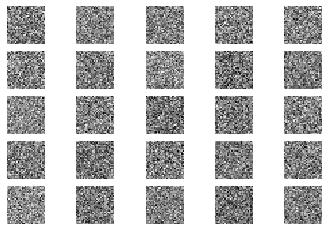

C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


1 [D loss: 0.404750, acc.: 90.62%] [G loss: 0.814268]
2 [D loss: 0.342837, acc.: 95.31%] [G loss: 0.832000]
3 [D loss: 0.302366, acc.: 95.31%] [G loss: 0.872258]
4 [D loss: 0.316541, acc.: 93.75%] [G loss: 0.971189]
5 [D loss: 0.268636, acc.: 96.88%] [G loss: 1.082471]
6 [D loss: 0.191931, acc.: 100.00%] [G loss: 1.170936]
7 [D loss: 0.195761, acc.: 100.00%] [G loss: 1.336675]
8 [D loss: 0.182102, acc.: 98.44%] [G loss: 1.478833]
9 [D loss: 0.152011, acc.: 100.00%] [G loss: 1.621144]
10 [D loss: 0.116895, acc.: 100.00%] [G loss: 1.710596]
11 [D loss: 0.093101, acc.: 100.00%] [G loss: 1.853116]
12 [D loss: 0.129136, acc.: 98.44%] [G loss: 1.953064]
13 [D loss: 0.114247, acc.: 98.44%] [G loss: 2.076311]
14 [D loss: 0.071909, acc.: 100.00%] [G loss: 2.251184]
15 [D loss: 0.073515, acc.: 100.00%] [G loss: 2.276063]
16 [D loss: 0.074627, acc.: 100.00%] [G loss: 2.349181]
17 [D loss: 0.060442, acc.: 100.00%] [G loss: 2.380348]
18 [D loss: 0.087486, acc.: 98.44%] [G loss: 2.580794]
19 [D loss

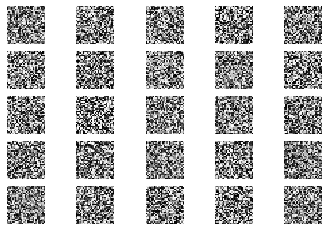

51 [D loss: 0.038885, acc.: 98.44%] [G loss: 3.864779]
52 [D loss: 0.040854, acc.: 98.44%] [G loss: 3.844933]
53 [D loss: 0.016830, acc.: 100.00%] [G loss: 3.873296]
54 [D loss: 0.023458, acc.: 100.00%] [G loss: 4.019727]
55 [D loss: 0.015856, acc.: 100.00%] [G loss: 4.113650]
56 [D loss: 0.011713, acc.: 100.00%] [G loss: 3.916759]
57 [D loss: 0.017033, acc.: 100.00%] [G loss: 4.095023]
58 [D loss: 0.011554, acc.: 100.00%] [G loss: 3.873908]
59 [D loss: 0.014967, acc.: 100.00%] [G loss: 4.075943]
60 [D loss: 0.014576, acc.: 100.00%] [G loss: 4.144916]
61 [D loss: 0.020500, acc.: 100.00%] [G loss: 4.086517]
62 [D loss: 0.013881, acc.: 100.00%] [G loss: 4.174507]
63 [D loss: 0.012712, acc.: 100.00%] [G loss: 4.286045]
64 [D loss: 0.012516, acc.: 100.00%] [G loss: 4.175964]
65 [D loss: 0.013673, acc.: 100.00%] [G loss: 4.260134]
66 [D loss: 0.013390, acc.: 100.00%] [G loss: 4.221454]
67 [D loss: 0.015617, acc.: 100.00%] [G loss: 4.294186]
68 [D loss: 0.015254, acc.: 100.00%] [G loss: 4.38

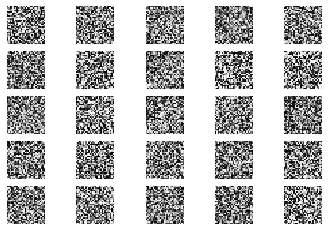

101 [D loss: 0.012497, acc.: 100.00%] [G loss: 4.953928]
102 [D loss: 0.007765, acc.: 100.00%] [G loss: 4.896049]
103 [D loss: 0.008668, acc.: 100.00%] [G loss: 5.010885]
104 [D loss: 0.015467, acc.: 100.00%] [G loss: 4.962612]
105 [D loss: 0.006303, acc.: 100.00%] [G loss: 4.842990]
106 [D loss: 0.007909, acc.: 100.00%] [G loss: 4.935162]
107 [D loss: 0.008448, acc.: 100.00%] [G loss: 4.903085]
108 [D loss: 0.010520, acc.: 100.00%] [G loss: 4.950392]
109 [D loss: 0.009738, acc.: 100.00%] [G loss: 4.935246]
110 [D loss: 0.009758, acc.: 100.00%] [G loss: 5.083574]
111 [D loss: 0.010738, acc.: 100.00%] [G loss: 5.063291]
112 [D loss: 0.012009, acc.: 100.00%] [G loss: 5.147097]
113 [D loss: 0.013228, acc.: 100.00%] [G loss: 5.189550]
114 [D loss: 0.009134, acc.: 100.00%] [G loss: 4.929636]
115 [D loss: 0.011196, acc.: 100.00%] [G loss: 5.050673]
116 [D loss: 0.010579, acc.: 100.00%] [G loss: 5.216806]
117 [D loss: 0.010236, acc.: 100.00%] [G loss: 5.054615]
118 [D loss: 0.009558, acc.: 10

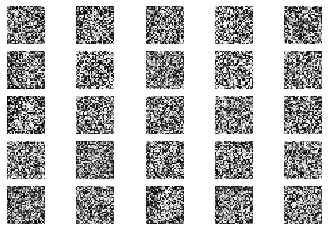

151 [D loss: 0.049178, acc.: 96.88%] [G loss: 4.665292]
152 [D loss: 0.076535, acc.: 96.88%] [G loss: 5.255513]
153 [D loss: 0.012986, acc.: 100.00%] [G loss: 5.577717]
154 [D loss: 0.056689, acc.: 96.88%] [G loss: 5.114873]
155 [D loss: 0.046735, acc.: 98.44%] [G loss: 5.440011]
156 [D loss: 0.023796, acc.: 100.00%] [G loss: 5.491243]
157 [D loss: 0.025219, acc.: 100.00%] [G loss: 5.524783]
158 [D loss: 0.052222, acc.: 100.00%] [G loss: 5.367567]
159 [D loss: 0.029813, acc.: 100.00%] [G loss: 5.379165]
160 [D loss: 0.034248, acc.: 98.44%] [G loss: 5.938559]
161 [D loss: 0.017985, acc.: 100.00%] [G loss: 6.180462]
162 [D loss: 0.060457, acc.: 98.44%] [G loss: 5.540668]
163 [D loss: 0.017990, acc.: 100.00%] [G loss: 5.388000]
164 [D loss: 0.020112, acc.: 100.00%] [G loss: 5.475107]
165 [D loss: 0.091675, acc.: 96.88%] [G loss: 5.561333]
166 [D loss: 0.294104, acc.: 89.06%] [G loss: 4.822909]
167 [D loss: 0.119359, acc.: 95.31%] [G loss: 3.827398]
168 [D loss: 0.205095, acc.: 90.62%] [G 

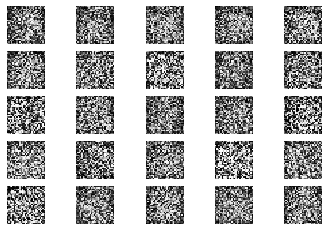

201 [D loss: 0.118877, acc.: 95.31%] [G loss: 5.227862]
202 [D loss: 0.114686, acc.: 92.19%] [G loss: 4.989063]
203 [D loss: 0.051550, acc.: 100.00%] [G loss: 4.618023]
204 [D loss: 0.171957, acc.: 95.31%] [G loss: 4.464290]
205 [D loss: 0.053280, acc.: 98.44%] [G loss: 4.861511]
206 [D loss: 0.168956, acc.: 98.44%] [G loss: 5.034942]
207 [D loss: 0.049871, acc.: 98.44%] [G loss: 4.612969]
208 [D loss: 0.079354, acc.: 98.44%] [G loss: 4.520065]
209 [D loss: 0.102662, acc.: 95.31%] [G loss: 5.054255]
210 [D loss: 0.059056, acc.: 100.00%] [G loss: 5.385889]
211 [D loss: 0.075795, acc.: 96.88%] [G loss: 4.919632]
212 [D loss: 0.093386, acc.: 96.88%] [G loss: 4.924779]
213 [D loss: 0.144597, acc.: 92.19%] [G loss: 5.009222]
214 [D loss: 0.503757, acc.: 78.12%] [G loss: 3.825774]
215 [D loss: 0.086910, acc.: 95.31%] [G loss: 5.186084]
216 [D loss: 0.102213, acc.: 98.44%] [G loss: 4.890877]
217 [D loss: 0.047317, acc.: 98.44%] [G loss: 4.923683]
218 [D loss: 0.086150, acc.: 96.88%] [G loss: 

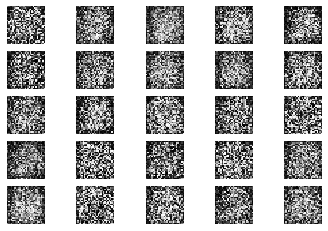

251 [D loss: 0.132200, acc.: 95.31%] [G loss: 4.118348]
252 [D loss: 0.249327, acc.: 89.06%] [G loss: 4.941173]
253 [D loss: 0.218894, acc.: 90.62%] [G loss: 3.791924]
254 [D loss: 0.246031, acc.: 85.94%] [G loss: 4.250099]
255 [D loss: 0.117345, acc.: 96.88%] [G loss: 4.327310]
256 [D loss: 0.172794, acc.: 95.31%] [G loss: 4.074645]
257 [D loss: 0.199322, acc.: 93.75%] [G loss: 3.551820]
258 [D loss: 0.141308, acc.: 96.88%] [G loss: 4.024432]
259 [D loss: 0.134426, acc.: 98.44%] [G loss: 3.405310]
260 [D loss: 0.328563, acc.: 82.81%] [G loss: 4.160475]
261 [D loss: 0.195148, acc.: 95.31%] [G loss: 3.489542]
262 [D loss: 0.137504, acc.: 96.88%] [G loss: 4.053306]
263 [D loss: 0.346751, acc.: 92.19%] [G loss: 3.069372]
264 [D loss: 0.130071, acc.: 95.31%] [G loss: 3.893745]
265 [D loss: 0.365714, acc.: 85.94%] [G loss: 3.076293]
266 [D loss: 0.149488, acc.: 92.19%] [G loss: 3.912210]
267 [D loss: 0.163725, acc.: 98.44%] [G loss: 4.244819]
268 [D loss: 0.165174, acc.: 95.31%] [G loss: 2.

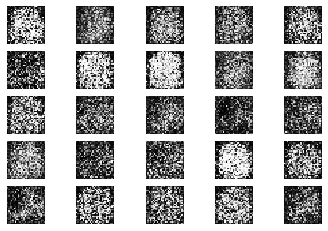

301 [D loss: 0.306029, acc.: 89.06%] [G loss: 3.596528]
302 [D loss: 0.375229, acc.: 79.69%] [G loss: 2.485862]
303 [D loss: 0.242674, acc.: 87.50%] [G loss: 3.422235]
304 [D loss: 0.613336, acc.: 79.69%] [G loss: 3.992488]
305 [D loss: 0.348892, acc.: 84.38%] [G loss: 2.875168]
306 [D loss: 0.388523, acc.: 87.50%] [G loss: 3.326655]
307 [D loss: 0.284221, acc.: 85.94%] [G loss: 3.114277]
308 [D loss: 0.475554, acc.: 81.25%] [G loss: 3.677135]
309 [D loss: 0.517547, acc.: 76.56%] [G loss: 2.784831]
310 [D loss: 0.392127, acc.: 84.38%] [G loss: 2.988880]
311 [D loss: 0.251250, acc.: 87.50%] [G loss: 3.628274]
312 [D loss: 0.507756, acc.: 76.56%] [G loss: 3.151475]
313 [D loss: 0.338066, acc.: 79.69%] [G loss: 3.141016]
314 [D loss: 0.250495, acc.: 90.62%] [G loss: 3.365625]
315 [D loss: 0.531346, acc.: 76.56%] [G loss: 2.855351]
316 [D loss: 0.280655, acc.: 90.62%] [G loss: 4.021680]
317 [D loss: 0.691652, acc.: 76.56%] [G loss: 2.475968]
318 [D loss: 0.410008, acc.: 75.00%] [G loss: 2.

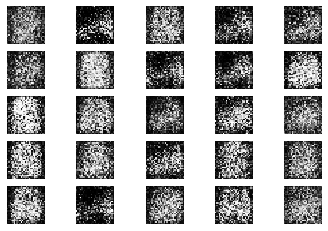

351 [D loss: 0.365341, acc.: 85.94%] [G loss: 2.865685]
352 [D loss: 0.417004, acc.: 87.50%] [G loss: 2.307134]
353 [D loss: 0.569287, acc.: 79.69%] [G loss: 2.175836]
354 [D loss: 0.483101, acc.: 79.69%] [G loss: 2.568824]
355 [D loss: 0.420426, acc.: 89.06%] [G loss: 2.300854]
356 [D loss: 0.442233, acc.: 84.38%] [G loss: 2.357198]
357 [D loss: 0.388274, acc.: 78.12%] [G loss: 2.154355]
358 [D loss: 0.475530, acc.: 85.94%] [G loss: 2.004205]
359 [D loss: 0.409987, acc.: 82.81%] [G loss: 2.442702]
360 [D loss: 0.983840, acc.: 57.81%] [G loss: 1.637856]
361 [D loss: 0.473813, acc.: 75.00%] [G loss: 2.768695]
362 [D loss: 0.263299, acc.: 89.06%] [G loss: 2.875506]
363 [D loss: 0.452763, acc.: 82.81%] [G loss: 1.778982]
364 [D loss: 0.392856, acc.: 84.38%] [G loss: 1.940031]
365 [D loss: 0.621558, acc.: 71.88%] [G loss: 1.992944]
366 [D loss: 0.338940, acc.: 85.94%] [G loss: 2.391602]
367 [D loss: 0.601209, acc.: 75.00%] [G loss: 1.797222]
368 [D loss: 0.829458, acc.: 59.38%] [G loss: 1.

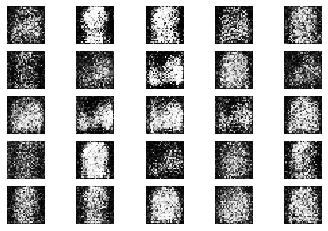

401 [D loss: 0.481315, acc.: 71.88%] [G loss: 1.852110]
402 [D loss: 0.556392, acc.: 68.75%] [G loss: 2.149173]
403 [D loss: 0.694079, acc.: 68.75%] [G loss: 1.817824]
404 [D loss: 0.755110, acc.: 57.81%] [G loss: 1.479943]
405 [D loss: 0.721337, acc.: 68.75%] [G loss: 1.809324]
406 [D loss: 0.723051, acc.: 59.38%] [G loss: 1.715583]
407 [D loss: 0.586043, acc.: 70.31%] [G loss: 1.877667]
408 [D loss: 0.733820, acc.: 54.69%] [G loss: 1.493119]
409 [D loss: 0.604504, acc.: 60.94%] [G loss: 1.285171]
410 [D loss: 0.837549, acc.: 56.25%] [G loss: 1.479437]
411 [D loss: 0.646423, acc.: 71.88%] [G loss: 1.648914]
412 [D loss: 0.516942, acc.: 68.75%] [G loss: 1.605944]
413 [D loss: 0.491768, acc.: 78.12%] [G loss: 1.590933]
414 [D loss: 0.683394, acc.: 60.94%] [G loss: 1.481086]
415 [D loss: 0.827505, acc.: 53.12%] [G loss: 1.264354]
416 [D loss: 0.539850, acc.: 73.44%] [G loss: 1.338441]
417 [D loss: 0.720972, acc.: 60.94%] [G loss: 1.276489]
418 [D loss: 0.536167, acc.: 71.88%] [G loss: 1.

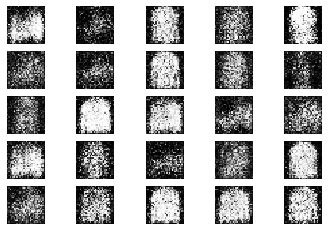

451 [D loss: 0.719800, acc.: 54.69%] [G loss: 1.251404]
452 [D loss: 0.606974, acc.: 70.31%] [G loss: 1.256540]
453 [D loss: 0.616564, acc.: 71.88%] [G loss: 1.277644]
454 [D loss: 0.652691, acc.: 64.06%] [G loss: 1.310073]
455 [D loss: 0.762885, acc.: 53.12%] [G loss: 1.144453]
456 [D loss: 0.657762, acc.: 64.06%] [G loss: 1.157906]
457 [D loss: 0.565553, acc.: 71.88%] [G loss: 1.195517]
458 [D loss: 0.592247, acc.: 71.88%] [G loss: 1.150796]
459 [D loss: 0.574791, acc.: 75.00%] [G loss: 1.028116]
460 [D loss: 0.737576, acc.: 59.38%] [G loss: 1.182505]
461 [D loss: 0.813761, acc.: 45.31%] [G loss: 1.116369]
462 [D loss: 0.573315, acc.: 68.75%] [G loss: 1.100821]
463 [D loss: 0.502496, acc.: 71.88%] [G loss: 1.246985]
464 [D loss: 0.516866, acc.: 73.44%] [G loss: 1.330091]
465 [D loss: 0.500285, acc.: 78.12%] [G loss: 1.511778]
466 [D loss: 0.745511, acc.: 62.50%] [G loss: 1.299057]
467 [D loss: 0.610591, acc.: 62.50%] [G loss: 1.209725]
468 [D loss: 0.734942, acc.: 57.81%] [G loss: 0.

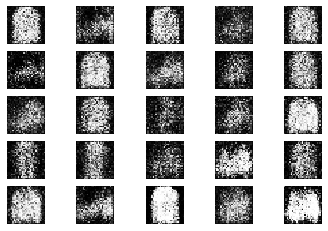

501 [D loss: 0.599561, acc.: 68.75%] [G loss: 1.230880]
502 [D loss: 0.489003, acc.: 79.69%] [G loss: 1.387259]
503 [D loss: 0.597978, acc.: 81.25%] [G loss: 1.246312]
504 [D loss: 0.620465, acc.: 68.75%] [G loss: 1.095999]
505 [D loss: 0.491946, acc.: 78.12%] [G loss: 1.201176]
506 [D loss: 0.462813, acc.: 81.25%] [G loss: 1.206121]
507 [D loss: 0.609580, acc.: 65.62%] [G loss: 1.217913]
508 [D loss: 0.636326, acc.: 70.31%] [G loss: 1.240456]
509 [D loss: 0.603643, acc.: 65.62%] [G loss: 1.198438]
510 [D loss: 0.535142, acc.: 79.69%] [G loss: 1.116954]
511 [D loss: 0.525715, acc.: 82.81%] [G loss: 1.207392]
512 [D loss: 0.580502, acc.: 75.00%] [G loss: 1.199813]
513 [D loss: 0.517985, acc.: 78.12%] [G loss: 1.180922]
514 [D loss: 0.613580, acc.: 67.19%] [G loss: 1.137591]
515 [D loss: 0.477939, acc.: 81.25%] [G loss: 1.273571]
516 [D loss: 0.538816, acc.: 70.31%] [G loss: 1.360467]
517 [D loss: 0.539813, acc.: 78.12%] [G loss: 1.162750]
518 [D loss: 0.579844, acc.: 67.19%] [G loss: 1.

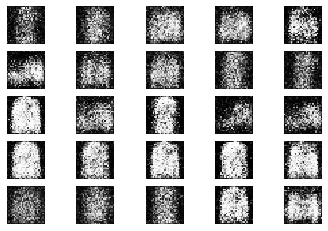

551 [D loss: 0.624943, acc.: 67.19%] [G loss: 1.159889]
552 [D loss: 0.521694, acc.: 75.00%] [G loss: 1.225175]
553 [D loss: 0.581560, acc.: 68.75%] [G loss: 1.204911]
554 [D loss: 0.528123, acc.: 76.56%] [G loss: 1.256747]
555 [D loss: 0.568535, acc.: 70.31%] [G loss: 1.231272]
556 [D loss: 0.692648, acc.: 65.62%] [G loss: 1.046309]
557 [D loss: 0.643164, acc.: 64.06%] [G loss: 1.205161]
558 [D loss: 0.642228, acc.: 64.06%] [G loss: 1.162390]
559 [D loss: 0.543117, acc.: 81.25%] [G loss: 1.133774]
560 [D loss: 0.533484, acc.: 71.88%] [G loss: 1.293846]
561 [D loss: 0.568626, acc.: 65.62%] [G loss: 1.121681]
562 [D loss: 0.598659, acc.: 65.62%] [G loss: 1.229686]
563 [D loss: 0.711965, acc.: 60.94%] [G loss: 1.132107]
564 [D loss: 0.645410, acc.: 62.50%] [G loss: 1.090815]
565 [D loss: 0.604568, acc.: 70.31%] [G loss: 1.107092]
566 [D loss: 0.570577, acc.: 73.44%] [G loss: 1.192321]
567 [D loss: 0.579444, acc.: 67.19%] [G loss: 1.113637]
568 [D loss: 0.596967, acc.: 70.31%] [G loss: 1.

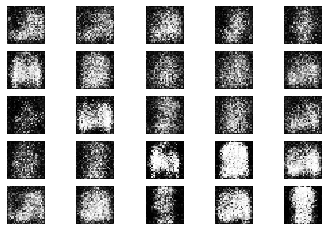

601 [D loss: 0.674950, acc.: 59.38%] [G loss: 1.114531]
602 [D loss: 0.568966, acc.: 71.88%] [G loss: 1.127416]
603 [D loss: 0.521013, acc.: 75.00%] [G loss: 1.158989]
604 [D loss: 0.554300, acc.: 71.88%] [G loss: 1.184633]
605 [D loss: 0.467264, acc.: 81.25%] [G loss: 1.214062]
606 [D loss: 0.509674, acc.: 73.44%] [G loss: 1.343956]
607 [D loss: 0.499193, acc.: 78.12%] [G loss: 1.261538]
608 [D loss: 0.533799, acc.: 73.44%] [G loss: 1.241332]
609 [D loss: 0.546129, acc.: 73.44%] [G loss: 1.173720]
610 [D loss: 0.556822, acc.: 78.12%] [G loss: 1.108463]
611 [D loss: 0.500467, acc.: 79.69%] [G loss: 1.172113]
612 [D loss: 0.626406, acc.: 62.50%] [G loss: 1.139350]
613 [D loss: 0.564072, acc.: 76.56%] [G loss: 1.190404]
614 [D loss: 0.566921, acc.: 75.00%] [G loss: 1.005937]
615 [D loss: 0.512270, acc.: 79.69%] [G loss: 1.071188]
616 [D loss: 0.561633, acc.: 75.00%] [G loss: 1.186075]
617 [D loss: 0.606530, acc.: 71.88%] [G loss: 1.203979]
618 [D loss: 0.543661, acc.: 73.44%] [G loss: 1.

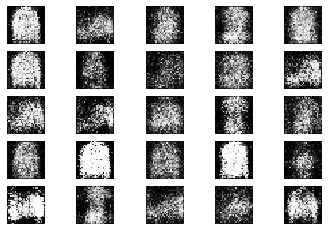

651 [D loss: 0.534194, acc.: 79.69%] [G loss: 1.253646]
652 [D loss: 0.528008, acc.: 75.00%] [G loss: 1.106476]
653 [D loss: 0.617942, acc.: 64.06%] [G loss: 1.131117]
654 [D loss: 0.616142, acc.: 60.94%] [G loss: 1.085925]
655 [D loss: 0.525806, acc.: 73.44%] [G loss: 1.144666]
656 [D loss: 0.616072, acc.: 68.75%] [G loss: 0.921521]
657 [D loss: 0.541253, acc.: 71.88%] [G loss: 0.962613]
658 [D loss: 0.555677, acc.: 70.31%] [G loss: 1.057489]
659 [D loss: 0.599624, acc.: 71.88%] [G loss: 1.109900]
660 [D loss: 0.629720, acc.: 62.50%] [G loss: 1.100575]
661 [D loss: 0.584083, acc.: 68.75%] [G loss: 1.028331]
662 [D loss: 0.559884, acc.: 73.44%] [G loss: 1.110929]
663 [D loss: 0.622418, acc.: 67.19%] [G loss: 1.006882]
664 [D loss: 0.601362, acc.: 67.19%] [G loss: 0.983303]
665 [D loss: 0.586611, acc.: 73.44%] [G loss: 1.210075]
666 [D loss: 0.521607, acc.: 79.69%] [G loss: 1.229453]
667 [D loss: 0.643842, acc.: 64.06%] [G loss: 1.111036]
668 [D loss: 0.525179, acc.: 75.00%] [G loss: 1.

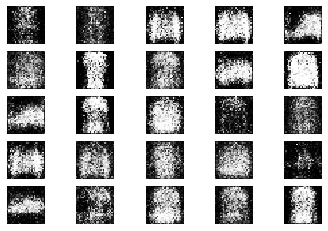

701 [D loss: 0.650291, acc.: 65.62%] [G loss: 1.098354]
702 [D loss: 0.609883, acc.: 67.19%] [G loss: 1.071462]
703 [D loss: 0.567223, acc.: 67.19%] [G loss: 1.087084]
704 [D loss: 0.592013, acc.: 75.00%] [G loss: 0.970674]
705 [D loss: 0.688561, acc.: 60.94%] [G loss: 0.968808]
706 [D loss: 0.578796, acc.: 65.62%] [G loss: 1.145852]
707 [D loss: 0.615468, acc.: 65.62%] [G loss: 1.036090]
708 [D loss: 0.525675, acc.: 79.69%] [G loss: 1.000904]
709 [D loss: 0.557251, acc.: 70.31%] [G loss: 1.102309]
710 [D loss: 0.700362, acc.: 59.38%] [G loss: 1.067139]
711 [D loss: 0.611303, acc.: 73.44%] [G loss: 1.102277]
712 [D loss: 0.573065, acc.: 71.88%] [G loss: 1.027781]
713 [D loss: 0.524758, acc.: 81.25%] [G loss: 1.112397]
714 [D loss: 0.596250, acc.: 68.75%] [G loss: 1.076906]
715 [D loss: 0.601624, acc.: 65.62%] [G loss: 1.017335]
716 [D loss: 0.577927, acc.: 71.88%] [G loss: 1.116981]
717 [D loss: 0.580705, acc.: 67.19%] [G loss: 0.950607]
718 [D loss: 0.648723, acc.: 68.75%] [G loss: 0.

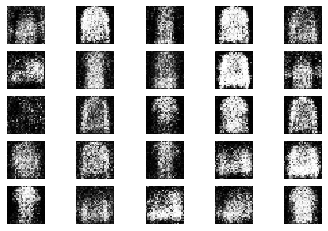

751 [D loss: 0.580912, acc.: 68.75%] [G loss: 1.045236]
752 [D loss: 0.503803, acc.: 79.69%] [G loss: 1.066706]
753 [D loss: 0.576769, acc.: 68.75%] [G loss: 1.109853]
754 [D loss: 0.553861, acc.: 73.44%] [G loss: 1.124281]
755 [D loss: 0.674432, acc.: 60.94%] [G loss: 1.069901]
756 [D loss: 0.593432, acc.: 62.50%] [G loss: 1.100926]
757 [D loss: 0.546987, acc.: 81.25%] [G loss: 1.028724]
758 [D loss: 0.592221, acc.: 73.44%] [G loss: 0.886748]
759 [D loss: 0.628362, acc.: 59.38%] [G loss: 0.920125]
760 [D loss: 0.590053, acc.: 71.88%] [G loss: 0.957800]
761 [D loss: 0.515812, acc.: 76.56%] [G loss: 0.980873]
762 [D loss: 0.542564, acc.: 76.56%] [G loss: 1.090588]
763 [D loss: 0.533516, acc.: 73.44%] [G loss: 1.111404]
764 [D loss: 0.549961, acc.: 78.12%] [G loss: 1.207684]
765 [D loss: 0.665961, acc.: 64.06%] [G loss: 1.035369]
766 [D loss: 0.646113, acc.: 56.25%] [G loss: 1.038323]
767 [D loss: 0.599586, acc.: 71.88%] [G loss: 1.031612]
768 [D loss: 0.567991, acc.: 68.75%] [G loss: 1.

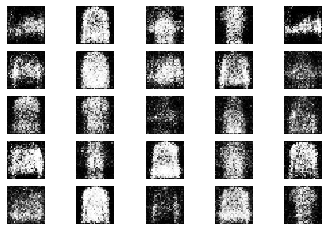

801 [D loss: 0.661296, acc.: 54.69%] [G loss: 1.102980]
802 [D loss: 0.642872, acc.: 64.06%] [G loss: 1.016239]
803 [D loss: 0.665644, acc.: 62.50%] [G loss: 0.987092]
804 [D loss: 0.581531, acc.: 73.44%] [G loss: 0.951756]
805 [D loss: 0.603636, acc.: 64.06%] [G loss: 1.001463]
806 [D loss: 0.584948, acc.: 68.75%] [G loss: 1.047653]
807 [D loss: 0.606739, acc.: 68.75%] [G loss: 1.062127]
808 [D loss: 0.606141, acc.: 75.00%] [G loss: 1.013806]
809 [D loss: 0.601907, acc.: 70.31%] [G loss: 1.020983]
810 [D loss: 0.607022, acc.: 71.88%] [G loss: 1.059591]
811 [D loss: 0.620607, acc.: 59.38%] [G loss: 1.022823]
812 [D loss: 0.531631, acc.: 71.88%] [G loss: 1.124723]
813 [D loss: 0.542982, acc.: 73.44%] [G loss: 1.063101]
814 [D loss: 0.525672, acc.: 82.81%] [G loss: 0.989749]
815 [D loss: 0.587388, acc.: 67.19%] [G loss: 1.084587]
816 [D loss: 0.607304, acc.: 64.06%] [G loss: 0.904294]
817 [D loss: 0.548625, acc.: 71.88%] [G loss: 0.942266]
818 [D loss: 0.609563, acc.: 65.62%] [G loss: 1.

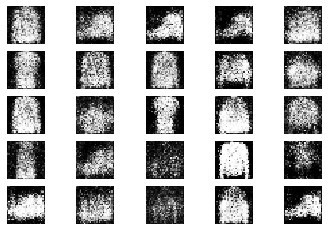

851 [D loss: 0.606711, acc.: 68.75%] [G loss: 1.047672]
852 [D loss: 0.661873, acc.: 54.69%] [G loss: 1.008897]
853 [D loss: 0.612130, acc.: 65.62%] [G loss: 0.985368]
854 [D loss: 0.564011, acc.: 76.56%] [G loss: 1.040264]
855 [D loss: 0.669376, acc.: 59.38%] [G loss: 0.942505]
856 [D loss: 0.588462, acc.: 71.88%] [G loss: 0.949582]
857 [D loss: 0.510931, acc.: 79.69%] [G loss: 0.979011]
858 [D loss: 0.693113, acc.: 54.69%] [G loss: 1.002986]
859 [D loss: 0.613620, acc.: 59.38%] [G loss: 0.984807]
860 [D loss: 0.591692, acc.: 68.75%] [G loss: 1.043555]
861 [D loss: 0.651014, acc.: 64.06%] [G loss: 1.044809]
862 [D loss: 0.611662, acc.: 68.75%] [G loss: 1.148584]
863 [D loss: 0.630557, acc.: 60.94%] [G loss: 1.028038]
864 [D loss: 0.560223, acc.: 68.75%] [G loss: 1.054796]
865 [D loss: 0.658946, acc.: 65.62%] [G loss: 1.068033]
866 [D loss: 0.603840, acc.: 62.50%] [G loss: 0.948006]
867 [D loss: 0.677011, acc.: 64.06%] [G loss: 1.024917]
868 [D loss: 0.632991, acc.: 64.06%] [G loss: 1.

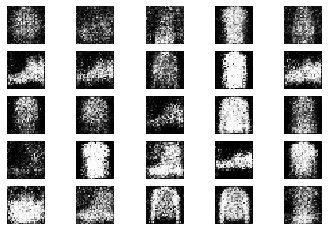

901 [D loss: 0.581776, acc.: 71.88%] [G loss: 1.088756]
902 [D loss: 0.608234, acc.: 62.50%] [G loss: 1.072087]
903 [D loss: 0.660256, acc.: 67.19%] [G loss: 0.981979]
904 [D loss: 0.565612, acc.: 73.44%] [G loss: 0.992003]
905 [D loss: 0.566027, acc.: 75.00%] [G loss: 0.958688]
906 [D loss: 0.621015, acc.: 67.19%] [G loss: 0.973345]
907 [D loss: 0.623349, acc.: 65.62%] [G loss: 0.994367]
908 [D loss: 0.639909, acc.: 62.50%] [G loss: 0.972576]
909 [D loss: 0.618088, acc.: 67.19%] [G loss: 1.066808]
910 [D loss: 0.568756, acc.: 73.44%] [G loss: 1.063831]
911 [D loss: 0.638753, acc.: 68.75%] [G loss: 1.047563]
912 [D loss: 0.577497, acc.: 73.44%] [G loss: 0.983983]
913 [D loss: 0.492497, acc.: 79.69%] [G loss: 1.002017]
914 [D loss: 0.639091, acc.: 56.25%] [G loss: 1.049157]
915 [D loss: 0.549755, acc.: 71.88%] [G loss: 1.111402]
916 [D loss: 0.639074, acc.: 67.19%] [G loss: 1.088524]
917 [D loss: 0.597064, acc.: 70.31%] [G loss: 1.085112]
918 [D loss: 0.577756, acc.: 73.44%] [G loss: 1.

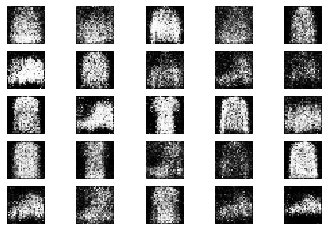

951 [D loss: 0.601672, acc.: 67.19%] [G loss: 0.972319]
952 [D loss: 0.634089, acc.: 59.38%] [G loss: 1.031317]
953 [D loss: 0.558625, acc.: 73.44%] [G loss: 0.989002]
954 [D loss: 0.685944, acc.: 56.25%] [G loss: 0.982547]
955 [D loss: 0.640431, acc.: 62.50%] [G loss: 1.022503]
956 [D loss: 0.573857, acc.: 71.88%] [G loss: 1.075496]
957 [D loss: 0.631283, acc.: 59.38%] [G loss: 1.030850]
958 [D loss: 0.660360, acc.: 67.19%] [G loss: 0.954518]
959 [D loss: 0.659084, acc.: 62.50%] [G loss: 1.094143]
960 [D loss: 0.633654, acc.: 64.06%] [G loss: 0.824065]
961 [D loss: 0.570552, acc.: 75.00%] [G loss: 0.965086]
962 [D loss: 0.552185, acc.: 70.31%] [G loss: 0.915099]
963 [D loss: 0.539230, acc.: 75.00%] [G loss: 0.954958]
964 [D loss: 0.533178, acc.: 76.56%] [G loss: 0.981915]
965 [D loss: 0.629465, acc.: 71.88%] [G loss: 1.002673]
966 [D loss: 0.591817, acc.: 71.88%] [G loss: 0.955356]
967 [D loss: 0.482290, acc.: 79.69%] [G loss: 0.908640]
968 [D loss: 0.631141, acc.: 60.94%] [G loss: 1.

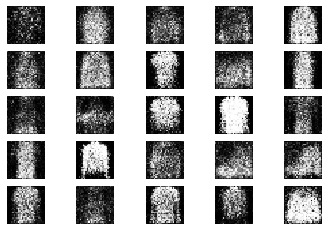

1001 [D loss: 0.584652, acc.: 70.31%] [G loss: 0.995985]
1002 [D loss: 0.623108, acc.: 60.94%] [G loss: 0.982738]
1003 [D loss: 0.676602, acc.: 59.38%] [G loss: 0.937334]
1004 [D loss: 0.559556, acc.: 75.00%] [G loss: 0.969406]
1005 [D loss: 0.528697, acc.: 78.12%] [G loss: 0.915233]
1006 [D loss: 0.596772, acc.: 73.44%] [G loss: 0.936930]
1007 [D loss: 0.638754, acc.: 59.38%] [G loss: 1.025843]
1008 [D loss: 0.544091, acc.: 76.56%] [G loss: 1.108629]
1009 [D loss: 0.655474, acc.: 59.38%] [G loss: 1.079296]
1010 [D loss: 0.625928, acc.: 68.75%] [G loss: 1.214267]
1011 [D loss: 0.520821, acc.: 78.12%] [G loss: 1.152319]
1012 [D loss: 0.655790, acc.: 65.62%] [G loss: 0.997688]
1013 [D loss: 0.570006, acc.: 75.00%] [G loss: 0.922879]
1014 [D loss: 0.613907, acc.: 71.88%] [G loss: 1.006043]
1015 [D loss: 0.498581, acc.: 75.00%] [G loss: 0.975167]
1016 [D loss: 0.605095, acc.: 68.75%] [G loss: 0.968902]
1017 [D loss: 0.583077, acc.: 70.31%] [G loss: 0.924896]
1018 [D loss: 0.598132, acc.: 6

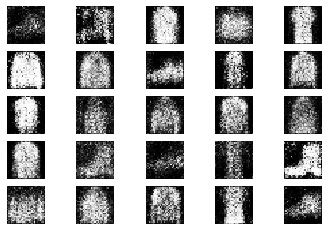

1051 [D loss: 0.529119, acc.: 71.88%] [G loss: 1.071819]
1052 [D loss: 0.586565, acc.: 75.00%] [G loss: 0.880290]
1053 [D loss: 0.680038, acc.: 53.12%] [G loss: 1.044779]
1054 [D loss: 0.574861, acc.: 67.19%] [G loss: 1.030640]
1055 [D loss: 0.564691, acc.: 73.44%] [G loss: 1.063736]
1056 [D loss: 0.528742, acc.: 78.12%] [G loss: 0.956177]
1057 [D loss: 0.572636, acc.: 73.44%] [G loss: 0.939202]
1058 [D loss: 0.543748, acc.: 71.88%] [G loss: 1.054086]
1059 [D loss: 0.619881, acc.: 60.94%] [G loss: 0.935225]
1060 [D loss: 0.576713, acc.: 71.88%] [G loss: 1.007920]
1061 [D loss: 0.647720, acc.: 60.94%] [G loss: 0.900504]
1062 [D loss: 0.533675, acc.: 78.12%] [G loss: 0.915856]
1063 [D loss: 0.594289, acc.: 67.19%] [G loss: 0.942611]
1064 [D loss: 0.646194, acc.: 64.06%] [G loss: 0.906633]
1065 [D loss: 0.539478, acc.: 76.56%] [G loss: 0.852924]
1066 [D loss: 0.644167, acc.: 64.06%] [G loss: 0.945657]
1067 [D loss: 0.605019, acc.: 70.31%] [G loss: 1.003983]
1068 [D loss: 0.643049, acc.: 6

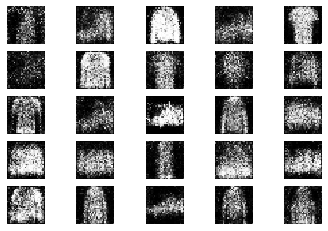

1101 [D loss: 0.539441, acc.: 76.56%] [G loss: 1.075869]
1102 [D loss: 0.560468, acc.: 76.56%] [G loss: 0.978317]
1103 [D loss: 0.617309, acc.: 57.81%] [G loss: 1.011275]
1104 [D loss: 0.525835, acc.: 82.81%] [G loss: 1.078525]
1105 [D loss: 0.674304, acc.: 59.38%] [G loss: 1.000537]
1106 [D loss: 0.529464, acc.: 75.00%] [G loss: 0.861517]
1107 [D loss: 0.539685, acc.: 78.12%] [G loss: 1.045626]
1108 [D loss: 0.614311, acc.: 71.88%] [G loss: 0.954324]
1109 [D loss: 0.615600, acc.: 71.88%] [G loss: 1.057133]
1110 [D loss: 0.605283, acc.: 71.88%] [G loss: 0.947954]
1111 [D loss: 0.561332, acc.: 68.75%] [G loss: 0.961659]
1112 [D loss: 0.611571, acc.: 70.31%] [G loss: 0.981336]
1113 [D loss: 0.626586, acc.: 68.75%] [G loss: 0.836037]
1114 [D loss: 0.630579, acc.: 68.75%] [G loss: 0.999978]
1115 [D loss: 0.555749, acc.: 78.12%] [G loss: 1.017704]
1116 [D loss: 0.611836, acc.: 67.19%] [G loss: 0.926940]
1117 [D loss: 0.581938, acc.: 71.88%] [G loss: 0.879997]
1118 [D loss: 0.665714, acc.: 6

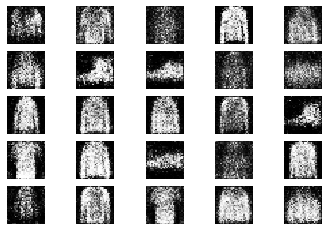

1151 [D loss: 0.666376, acc.: 60.94%] [G loss: 0.912124]
1152 [D loss: 0.532693, acc.: 76.56%] [G loss: 1.022439]
1153 [D loss: 0.653002, acc.: 57.81%] [G loss: 0.880465]
1154 [D loss: 0.669767, acc.: 60.94%] [G loss: 0.865329]
1155 [D loss: 0.616788, acc.: 67.19%] [G loss: 0.987422]
1156 [D loss: 0.702030, acc.: 56.25%] [G loss: 0.919199]
1157 [D loss: 0.620281, acc.: 65.62%] [G loss: 0.957082]
1158 [D loss: 0.599463, acc.: 73.44%] [G loss: 0.964826]
1159 [D loss: 0.702944, acc.: 57.81%] [G loss: 0.890116]
1160 [D loss: 0.603804, acc.: 57.81%] [G loss: 0.901919]
1161 [D loss: 0.667184, acc.: 56.25%] [G loss: 0.973235]
1162 [D loss: 0.588355, acc.: 68.75%] [G loss: 0.914993]
1163 [D loss: 0.613128, acc.: 67.19%] [G loss: 0.963471]
1164 [D loss: 0.595558, acc.: 73.44%] [G loss: 0.920294]
1165 [D loss: 0.641177, acc.: 50.00%] [G loss: 0.899020]
1166 [D loss: 0.612503, acc.: 64.06%] [G loss: 0.933014]
1167 [D loss: 0.620353, acc.: 60.94%] [G loss: 0.959816]
1168 [D loss: 0.594797, acc.: 6

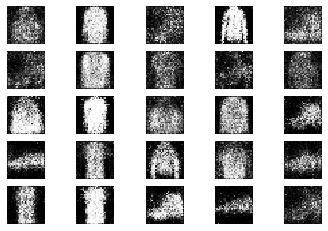

1201 [D loss: 0.565415, acc.: 70.31%] [G loss: 0.969102]
1202 [D loss: 0.595120, acc.: 73.44%] [G loss: 0.974286]
1203 [D loss: 0.565005, acc.: 73.44%] [G loss: 0.970274]
1204 [D loss: 0.612483, acc.: 68.75%] [G loss: 1.015280]
1205 [D loss: 0.630977, acc.: 68.75%] [G loss: 0.927652]
1206 [D loss: 0.646898, acc.: 67.19%] [G loss: 0.983058]
1207 [D loss: 0.589142, acc.: 73.44%] [G loss: 0.890205]
1208 [D loss: 0.676740, acc.: 64.06%] [G loss: 0.933275]
1209 [D loss: 0.600977, acc.: 68.75%] [G loss: 0.942382]
1210 [D loss: 0.555331, acc.: 73.44%] [G loss: 0.901976]
1211 [D loss: 0.631577, acc.: 67.19%] [G loss: 0.980229]
1212 [D loss: 0.549520, acc.: 76.56%] [G loss: 0.935801]
1213 [D loss: 0.604663, acc.: 65.62%] [G loss: 0.896931]
1214 [D loss: 0.592783, acc.: 76.56%] [G loss: 0.912335]
1215 [D loss: 0.609192, acc.: 64.06%] [G loss: 0.865409]
1216 [D loss: 0.609159, acc.: 75.00%] [G loss: 0.927495]
1217 [D loss: 0.656630, acc.: 65.62%] [G loss: 0.971900]
1218 [D loss: 0.575197, acc.: 7

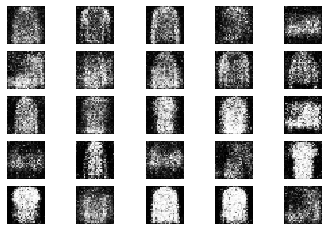

1251 [D loss: 0.561471, acc.: 70.31%] [G loss: 0.907514]
1252 [D loss: 0.600313, acc.: 71.88%] [G loss: 0.932971]
1253 [D loss: 0.639363, acc.: 59.38%] [G loss: 0.901893]
1254 [D loss: 0.706580, acc.: 50.00%] [G loss: 0.980913]
1255 [D loss: 0.646535, acc.: 67.19%] [G loss: 0.956814]
1256 [D loss: 0.573912, acc.: 68.75%] [G loss: 0.980776]
1257 [D loss: 0.635500, acc.: 62.50%] [G loss: 0.908096]
1258 [D loss: 0.671200, acc.: 57.81%] [G loss: 0.971934]
1259 [D loss: 0.605742, acc.: 65.62%] [G loss: 0.962963]
1260 [D loss: 0.582325, acc.: 70.31%] [G loss: 0.898962]
1261 [D loss: 0.539510, acc.: 78.12%] [G loss: 0.971412]
1262 [D loss: 0.637269, acc.: 60.94%] [G loss: 0.883546]
1263 [D loss: 0.626276, acc.: 65.62%] [G loss: 0.928725]
1264 [D loss: 0.555231, acc.: 79.69%] [G loss: 0.923436]
1265 [D loss: 0.563136, acc.: 75.00%] [G loss: 0.809205]
1266 [D loss: 0.641159, acc.: 68.75%] [G loss: 0.898147]
1267 [D loss: 0.608527, acc.: 64.06%] [G loss: 0.906972]
1268 [D loss: 0.588229, acc.: 7

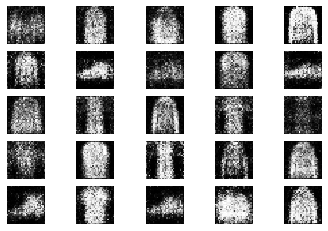

1301 [D loss: 0.605907, acc.: 62.50%] [G loss: 0.875186]
1302 [D loss: 0.623188, acc.: 62.50%] [G loss: 0.907493]
1303 [D loss: 0.641019, acc.: 57.81%] [G loss: 0.861493]
1304 [D loss: 0.558174, acc.: 70.31%] [G loss: 0.920120]
1305 [D loss: 0.621021, acc.: 65.62%] [G loss: 0.901510]
1306 [D loss: 0.581287, acc.: 68.75%] [G loss: 0.872569]
1307 [D loss: 0.540170, acc.: 79.69%] [G loss: 0.859632]
1308 [D loss: 0.597792, acc.: 64.06%] [G loss: 0.916123]
1309 [D loss: 0.602528, acc.: 68.75%] [G loss: 0.901206]
1310 [D loss: 0.617220, acc.: 70.31%] [G loss: 0.929948]
1311 [D loss: 0.575683, acc.: 67.19%] [G loss: 0.864481]
1312 [D loss: 0.629148, acc.: 70.31%] [G loss: 0.822051]
1313 [D loss: 0.505717, acc.: 81.25%] [G loss: 0.880263]
1314 [D loss: 0.657135, acc.: 64.06%] [G loss: 0.821118]
1315 [D loss: 0.597606, acc.: 68.75%] [G loss: 0.900028]
1316 [D loss: 0.618119, acc.: 68.75%] [G loss: 0.918995]
1317 [D loss: 0.632438, acc.: 60.94%] [G loss: 1.099232]
1318 [D loss: 0.579989, acc.: 7

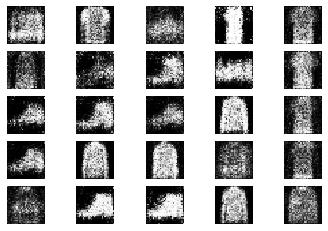

1351 [D loss: 0.639146, acc.: 68.75%] [G loss: 0.838110]
1352 [D loss: 0.660299, acc.: 57.81%] [G loss: 0.907495]
1353 [D loss: 0.631960, acc.: 64.06%] [G loss: 0.901686]
1354 [D loss: 0.667995, acc.: 56.25%] [G loss: 0.921841]
1355 [D loss: 0.545601, acc.: 75.00%] [G loss: 0.959275]
1356 [D loss: 0.688697, acc.: 51.56%] [G loss: 0.897169]
1357 [D loss: 0.604206, acc.: 68.75%] [G loss: 0.947976]
1358 [D loss: 0.619914, acc.: 67.19%] [G loss: 0.989494]
1359 [D loss: 0.610156, acc.: 64.06%] [G loss: 0.945397]
1360 [D loss: 0.587848, acc.: 65.62%] [G loss: 0.984353]
1361 [D loss: 0.673386, acc.: 60.94%] [G loss: 0.961084]
1362 [D loss: 0.712924, acc.: 50.00%] [G loss: 0.861427]
1363 [D loss: 0.661340, acc.: 64.06%] [G loss: 0.880424]
1364 [D loss: 0.646868, acc.: 51.56%] [G loss: 0.993312]
1365 [D loss: 0.605186, acc.: 70.31%] [G loss: 0.980835]
1366 [D loss: 0.642421, acc.: 65.62%] [G loss: 0.960464]
1367 [D loss: 0.595640, acc.: 70.31%] [G loss: 0.838313]
1368 [D loss: 0.673911, acc.: 5

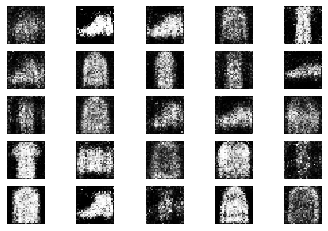

1401 [D loss: 0.639435, acc.: 57.81%] [G loss: 0.908792]
1402 [D loss: 0.626055, acc.: 67.19%] [G loss: 0.929124]
1403 [D loss: 0.576574, acc.: 70.31%] [G loss: 0.860992]
1404 [D loss: 0.624357, acc.: 62.50%] [G loss: 0.931129]
1405 [D loss: 0.604885, acc.: 67.19%] [G loss: 0.969605]
1406 [D loss: 0.662887, acc.: 54.69%] [G loss: 0.965189]
1407 [D loss: 0.554540, acc.: 71.88%] [G loss: 0.943087]
1408 [D loss: 0.643796, acc.: 57.81%] [G loss: 0.897726]
1409 [D loss: 0.606749, acc.: 73.44%] [G loss: 0.937990]
1410 [D loss: 0.641879, acc.: 65.62%] [G loss: 0.898172]
1411 [D loss: 0.600795, acc.: 68.75%] [G loss: 0.822165]
1412 [D loss: 0.604700, acc.: 71.88%] [G loss: 0.853078]
1413 [D loss: 0.576608, acc.: 76.56%] [G loss: 0.926952]
1414 [D loss: 0.593057, acc.: 70.31%] [G loss: 0.964517]
1415 [D loss: 0.574072, acc.: 73.44%] [G loss: 0.921659]
1416 [D loss: 0.650581, acc.: 57.81%] [G loss: 0.929125]
1417 [D loss: 0.586322, acc.: 67.19%] [G loss: 0.875025]
1418 [D loss: 0.559922, acc.: 7

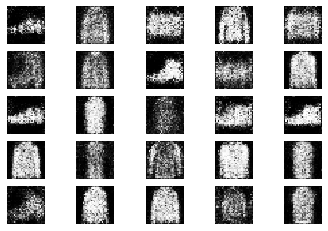

1451 [D loss: 0.654263, acc.: 60.94%] [G loss: 0.874107]
1452 [D loss: 0.651154, acc.: 60.94%] [G loss: 0.880978]
1453 [D loss: 0.604438, acc.: 65.62%] [G loss: 0.986119]
1454 [D loss: 0.589989, acc.: 67.19%] [G loss: 0.978004]
1455 [D loss: 0.619675, acc.: 67.19%] [G loss: 0.954395]
1456 [D loss: 0.622805, acc.: 62.50%] [G loss: 0.858366]
1457 [D loss: 0.602316, acc.: 62.50%] [G loss: 1.029307]
1458 [D loss: 0.594206, acc.: 60.94%] [G loss: 0.930540]
1459 [D loss: 0.535221, acc.: 76.56%] [G loss: 0.926902]
1460 [D loss: 0.564755, acc.: 73.44%] [G loss: 0.881731]
1461 [D loss: 0.649134, acc.: 65.62%] [G loss: 0.956380]
1462 [D loss: 0.615866, acc.: 70.31%] [G loss: 0.832690]
1463 [D loss: 0.671701, acc.: 62.50%] [G loss: 0.819799]
1464 [D loss: 0.591834, acc.: 68.75%] [G loss: 0.953133]
1465 [D loss: 0.599020, acc.: 67.19%] [G loss: 0.901124]
1466 [D loss: 0.678437, acc.: 51.56%] [G loss: 0.911985]
1467 [D loss: 0.597607, acc.: 70.31%] [G loss: 0.980761]
1468 [D loss: 0.628423, acc.: 6

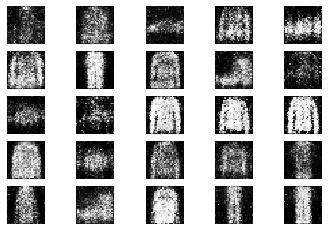

1501 [D loss: 0.643366, acc.: 60.94%] [G loss: 0.785927]
1502 [D loss: 0.599448, acc.: 70.31%] [G loss: 0.834454]
1503 [D loss: 0.573972, acc.: 75.00%] [G loss: 1.016649]
1504 [D loss: 0.628007, acc.: 64.06%] [G loss: 0.860860]
1505 [D loss: 0.668983, acc.: 59.38%] [G loss: 0.839902]
1506 [D loss: 0.645394, acc.: 65.62%] [G loss: 0.959215]
1507 [D loss: 0.592293, acc.: 75.00%] [G loss: 0.884487]
1508 [D loss: 0.615388, acc.: 73.44%] [G loss: 0.971650]
1509 [D loss: 0.607785, acc.: 64.06%] [G loss: 0.908809]
1510 [D loss: 0.582872, acc.: 75.00%] [G loss: 0.947327]
1511 [D loss: 0.640114, acc.: 59.38%] [G loss: 0.883167]
1512 [D loss: 0.541701, acc.: 73.44%] [G loss: 0.931063]
1513 [D loss: 0.590741, acc.: 67.19%] [G loss: 0.961296]
1514 [D loss: 0.580956, acc.: 73.44%] [G loss: 0.943249]
1515 [D loss: 0.632318, acc.: 64.06%] [G loss: 1.004046]
1516 [D loss: 0.646995, acc.: 62.50%] [G loss: 0.983456]
1517 [D loss: 0.550615, acc.: 73.44%] [G loss: 0.870726]
1518 [D loss: 0.582748, acc.: 7

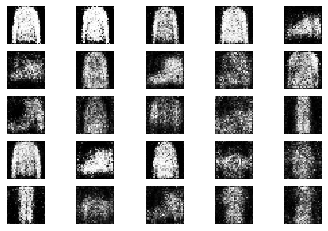

1551 [D loss: 0.587237, acc.: 68.75%] [G loss: 0.897538]
1552 [D loss: 0.564983, acc.: 76.56%] [G loss: 0.900444]
1553 [D loss: 0.705043, acc.: 62.50%] [G loss: 0.810832]
1554 [D loss: 0.614212, acc.: 67.19%] [G loss: 0.918257]
1555 [D loss: 0.736294, acc.: 46.88%] [G loss: 0.912365]
1556 [D loss: 0.607568, acc.: 60.94%] [G loss: 0.875928]
1557 [D loss: 0.588752, acc.: 60.94%] [G loss: 0.963869]
1558 [D loss: 0.569854, acc.: 65.62%] [G loss: 0.999958]
1559 [D loss: 0.619558, acc.: 64.06%] [G loss: 0.945389]
1560 [D loss: 0.586345, acc.: 71.88%] [G loss: 0.941292]
1561 [D loss: 0.620851, acc.: 65.62%] [G loss: 0.801670]
1562 [D loss: 0.666667, acc.: 53.12%] [G loss: 0.872200]
1563 [D loss: 0.631813, acc.: 67.19%] [G loss: 0.892974]
1564 [D loss: 0.589522, acc.: 70.31%] [G loss: 0.880742]
1565 [D loss: 0.589601, acc.: 65.62%] [G loss: 0.896340]
1566 [D loss: 0.599884, acc.: 64.06%] [G loss: 0.914897]
1567 [D loss: 0.568205, acc.: 67.19%] [G loss: 0.904093]
1568 [D loss: 0.647374, acc.: 6

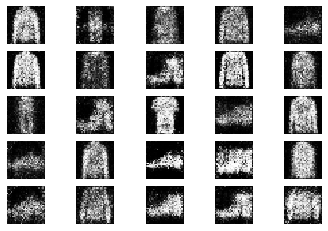

1601 [D loss: 0.615844, acc.: 64.06%] [G loss: 0.909542]
1602 [D loss: 0.552758, acc.: 73.44%] [G loss: 0.994762]
1603 [D loss: 0.636408, acc.: 65.62%] [G loss: 0.873140]
1604 [D loss: 0.579700, acc.: 68.75%] [G loss: 0.887956]
1605 [D loss: 0.676606, acc.: 57.81%] [G loss: 0.817583]
1606 [D loss: 0.640293, acc.: 62.50%] [G loss: 0.840733]
1607 [D loss: 0.627943, acc.: 60.94%] [G loss: 1.011855]
1608 [D loss: 0.663389, acc.: 56.25%] [G loss: 0.928683]
1609 [D loss: 0.708640, acc.: 62.50%] [G loss: 0.912015]
1610 [D loss: 0.617017, acc.: 65.62%] [G loss: 0.916373]
1611 [D loss: 0.559262, acc.: 79.69%] [G loss: 0.875951]
1612 [D loss: 0.607074, acc.: 78.12%] [G loss: 1.049051]
1613 [D loss: 0.651345, acc.: 59.38%] [G loss: 0.818760]
1614 [D loss: 0.695318, acc.: 53.12%] [G loss: 0.861852]
1615 [D loss: 0.645073, acc.: 56.25%] [G loss: 0.922534]
1616 [D loss: 0.643511, acc.: 60.94%] [G loss: 0.888088]
1617 [D loss: 0.667974, acc.: 64.06%] [G loss: 0.902992]
1618 [D loss: 0.642025, acc.: 6

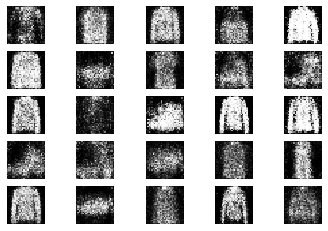

1651 [D loss: 0.586322, acc.: 68.75%] [G loss: 0.907048]
1652 [D loss: 0.605165, acc.: 68.75%] [G loss: 0.943759]
1653 [D loss: 0.656287, acc.: 60.94%] [G loss: 0.921610]
1654 [D loss: 0.568991, acc.: 71.88%] [G loss: 0.984467]
1655 [D loss: 0.639803, acc.: 64.06%] [G loss: 0.979184]
1656 [D loss: 0.575496, acc.: 75.00%] [G loss: 0.893510]
1657 [D loss: 0.587342, acc.: 68.75%] [G loss: 0.927557]
1658 [D loss: 0.632782, acc.: 56.25%] [G loss: 0.877783]
1659 [D loss: 0.639827, acc.: 60.94%] [G loss: 0.960830]
1660 [D loss: 0.634048, acc.: 65.62%] [G loss: 0.903090]
1661 [D loss: 0.556053, acc.: 79.69%] [G loss: 1.002981]
1662 [D loss: 0.623670, acc.: 68.75%] [G loss: 1.017000]
1663 [D loss: 0.620510, acc.: 67.19%] [G loss: 0.956543]
1664 [D loss: 0.629172, acc.: 67.19%] [G loss: 0.817159]
1665 [D loss: 0.626918, acc.: 67.19%] [G loss: 0.787269]
1666 [D loss: 0.631855, acc.: 67.19%] [G loss: 0.902648]
1667 [D loss: 0.585082, acc.: 71.88%] [G loss: 0.880343]
1668 [D loss: 0.581294, acc.: 7

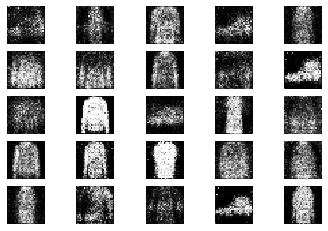

1701 [D loss: 0.639122, acc.: 62.50%] [G loss: 0.928908]
1702 [D loss: 0.558962, acc.: 71.88%] [G loss: 0.885167]
1703 [D loss: 0.599965, acc.: 65.62%] [G loss: 0.938310]
1704 [D loss: 0.647780, acc.: 56.25%] [G loss: 1.015852]
1705 [D loss: 0.648909, acc.: 60.94%] [G loss: 0.956662]
1706 [D loss: 0.618597, acc.: 57.81%] [G loss: 0.950498]
1707 [D loss: 0.624746, acc.: 67.19%] [G loss: 0.902433]
1708 [D loss: 0.640489, acc.: 60.94%] [G loss: 0.946236]
1709 [D loss: 0.654945, acc.: 62.50%] [G loss: 0.899575]
1710 [D loss: 0.680236, acc.: 59.38%] [G loss: 0.963749]
1711 [D loss: 0.611971, acc.: 67.19%] [G loss: 0.946315]
1712 [D loss: 0.542278, acc.: 73.44%] [G loss: 0.974848]
1713 [D loss: 0.678086, acc.: 59.38%] [G loss: 0.978653]
1714 [D loss: 0.597076, acc.: 68.75%] [G loss: 0.929795]
1715 [D loss: 0.596176, acc.: 65.62%] [G loss: 0.918889]
1716 [D loss: 0.601351, acc.: 70.31%] [G loss: 0.893364]
1717 [D loss: 0.581133, acc.: 68.75%] [G loss: 0.928788]
1718 [D loss: 0.544016, acc.: 7

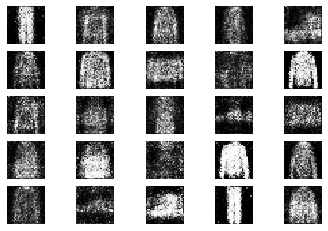

1751 [D loss: 0.631767, acc.: 71.88%] [G loss: 1.028064]
1752 [D loss: 0.707407, acc.: 57.81%] [G loss: 0.851547]
1753 [D loss: 0.628283, acc.: 64.06%] [G loss: 0.997238]
1754 [D loss: 0.638253, acc.: 68.75%] [G loss: 0.866369]
1755 [D loss: 0.595170, acc.: 73.44%] [G loss: 0.945177]
1756 [D loss: 0.634866, acc.: 67.19%] [G loss: 0.848542]
1757 [D loss: 0.605563, acc.: 65.62%] [G loss: 0.897749]
1758 [D loss: 0.535025, acc.: 78.12%] [G loss: 0.916125]
1759 [D loss: 0.678616, acc.: 59.38%] [G loss: 0.862155]
1760 [D loss: 0.619687, acc.: 64.06%] [G loss: 0.915075]
1761 [D loss: 0.678065, acc.: 56.25%] [G loss: 0.956331]
1762 [D loss: 0.623832, acc.: 59.38%] [G loss: 1.013597]
1763 [D loss: 0.589534, acc.: 64.06%] [G loss: 0.964477]
1764 [D loss: 0.642195, acc.: 57.81%] [G loss: 0.969749]
1765 [D loss: 0.610143, acc.: 67.19%] [G loss: 0.835511]
1766 [D loss: 0.641899, acc.: 62.50%] [G loss: 0.924735]
1767 [D loss: 0.587942, acc.: 70.31%] [G loss: 0.962496]
1768 [D loss: 0.565803, acc.: 7

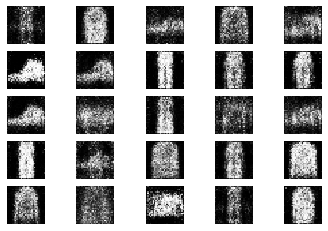

1801 [D loss: 0.622811, acc.: 67.19%] [G loss: 0.943613]
1802 [D loss: 0.655979, acc.: 68.75%] [G loss: 0.884532]
1803 [D loss: 0.600523, acc.: 67.19%] [G loss: 0.928260]
1804 [D loss: 0.673167, acc.: 57.81%] [G loss: 0.865219]
1805 [D loss: 0.596457, acc.: 65.62%] [G loss: 0.858571]
1806 [D loss: 0.638165, acc.: 65.62%] [G loss: 0.999309]
1807 [D loss: 0.568888, acc.: 75.00%] [G loss: 0.862084]
1808 [D loss: 0.680989, acc.: 54.69%] [G loss: 0.829141]
1809 [D loss: 0.647015, acc.: 56.25%] [G loss: 0.889006]
1810 [D loss: 0.614906, acc.: 62.50%] [G loss: 0.873352]
1811 [D loss: 0.557363, acc.: 76.56%] [G loss: 0.960499]
1812 [D loss: 0.625446, acc.: 64.06%] [G loss: 0.925839]
1813 [D loss: 0.637568, acc.: 65.62%] [G loss: 0.896040]
1814 [D loss: 0.572447, acc.: 73.44%] [G loss: 0.943277]
1815 [D loss: 0.614389, acc.: 62.50%] [G loss: 0.949919]
1816 [D loss: 0.695562, acc.: 54.69%] [G loss: 1.001687]
1817 [D loss: 0.623128, acc.: 67.19%] [G loss: 0.903366]
1818 [D loss: 0.591483, acc.: 7

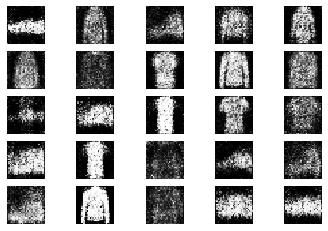

1851 [D loss: 0.588364, acc.: 70.31%] [G loss: 0.928245]
1852 [D loss: 0.659047, acc.: 57.81%] [G loss: 0.904752]
1853 [D loss: 0.642803, acc.: 59.38%] [G loss: 0.963763]
1854 [D loss: 0.603780, acc.: 62.50%] [G loss: 0.926830]
1855 [D loss: 0.611877, acc.: 62.50%] [G loss: 0.930905]
1856 [D loss: 0.669973, acc.: 67.19%] [G loss: 0.946146]
1857 [D loss: 0.601875, acc.: 70.31%] [G loss: 0.976430]
1858 [D loss: 0.590877, acc.: 67.19%] [G loss: 0.827553]
1859 [D loss: 0.641530, acc.: 65.62%] [G loss: 0.910377]
1860 [D loss: 0.634594, acc.: 64.06%] [G loss: 0.928345]
1861 [D loss: 0.587007, acc.: 71.88%] [G loss: 0.917822]
1862 [D loss: 0.628905, acc.: 68.75%] [G loss: 0.834744]
1863 [D loss: 0.637554, acc.: 65.62%] [G loss: 0.999862]
1864 [D loss: 0.596101, acc.: 75.00%] [G loss: 0.942637]
1865 [D loss: 0.579567, acc.: 70.31%] [G loss: 0.970774]
1866 [D loss: 0.629923, acc.: 62.50%] [G loss: 0.816769]
1867 [D loss: 0.615022, acc.: 62.50%] [G loss: 0.961044]
1868 [D loss: 0.599028, acc.: 7

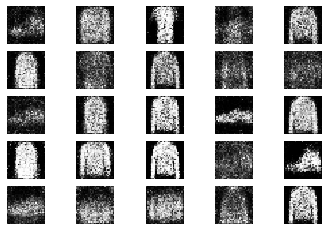

1901 [D loss: 0.538668, acc.: 78.12%] [G loss: 0.948186]
1902 [D loss: 0.635627, acc.: 65.62%] [G loss: 0.948688]
1903 [D loss: 0.649287, acc.: 62.50%] [G loss: 0.892497]
1904 [D loss: 0.565883, acc.: 71.88%] [G loss: 0.882089]
1905 [D loss: 0.574835, acc.: 71.88%] [G loss: 0.817983]
1906 [D loss: 0.583291, acc.: 67.19%] [G loss: 0.914817]
1907 [D loss: 0.690388, acc.: 57.81%] [G loss: 0.986808]
1908 [D loss: 0.617362, acc.: 70.31%] [G loss: 0.965940]
1909 [D loss: 0.594143, acc.: 67.19%] [G loss: 0.989632]
1910 [D loss: 0.594060, acc.: 71.88%] [G loss: 0.943873]
1911 [D loss: 0.608326, acc.: 67.19%] [G loss: 0.974512]
1912 [D loss: 0.645126, acc.: 62.50%] [G loss: 0.855316]
1913 [D loss: 0.624803, acc.: 62.50%] [G loss: 0.942737]
1914 [D loss: 0.588543, acc.: 71.88%] [G loss: 1.007668]
1915 [D loss: 0.665795, acc.: 54.69%] [G loss: 0.912515]
1916 [D loss: 0.574001, acc.: 71.88%] [G loss: 0.848294]
1917 [D loss: 0.618267, acc.: 65.62%] [G loss: 0.993206]
1918 [D loss: 0.560587, acc.: 7

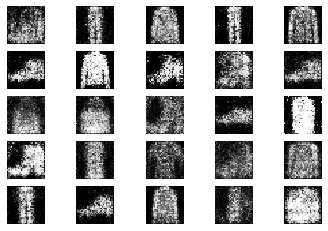

1951 [D loss: 0.558868, acc.: 78.12%] [G loss: 0.943974]
1952 [D loss: 0.576950, acc.: 60.94%] [G loss: 0.891225]
1953 [D loss: 0.615169, acc.: 71.88%] [G loss: 0.914846]
1954 [D loss: 0.596342, acc.: 59.38%] [G loss: 1.031616]
1955 [D loss: 0.609461, acc.: 65.62%] [G loss: 0.882034]
1956 [D loss: 0.589262, acc.: 67.19%] [G loss: 0.937887]
1957 [D loss: 0.513820, acc.: 79.69%] [G loss: 0.982817]
1958 [D loss: 0.580078, acc.: 67.19%] [G loss: 1.038767]
1959 [D loss: 0.572800, acc.: 71.88%] [G loss: 1.068878]
1960 [D loss: 0.667480, acc.: 60.94%] [G loss: 0.852230]
1961 [D loss: 0.636099, acc.: 57.81%] [G loss: 0.958889]
1962 [D loss: 0.614926, acc.: 67.19%] [G loss: 0.976397]
1963 [D loss: 0.629411, acc.: 68.75%] [G loss: 0.950662]
1964 [D loss: 0.602519, acc.: 71.88%] [G loss: 0.931200]
1965 [D loss: 0.651910, acc.: 60.94%] [G loss: 0.810290]
1966 [D loss: 0.671194, acc.: 57.81%] [G loss: 0.822158]
1967 [D loss: 0.648323, acc.: 60.94%] [G loss: 0.904028]
1968 [D loss: 0.586170, acc.: 7

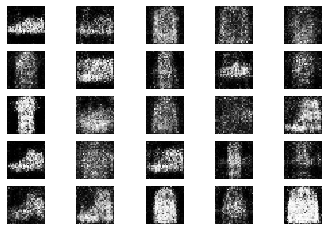

2001 [D loss: 0.664659, acc.: 59.38%] [G loss: 0.923288]
2002 [D loss: 0.574510, acc.: 73.44%] [G loss: 0.978930]
2003 [D loss: 0.595224, acc.: 68.75%] [G loss: 1.020260]
2004 [D loss: 0.602509, acc.: 68.75%] [G loss: 0.836667]
2005 [D loss: 0.587015, acc.: 73.44%] [G loss: 0.926413]
2006 [D loss: 0.589297, acc.: 71.88%] [G loss: 0.954949]
2007 [D loss: 0.570864, acc.: 71.88%] [G loss: 0.975779]
2008 [D loss: 0.603509, acc.: 67.19%] [G loss: 0.899832]
2009 [D loss: 0.579006, acc.: 71.88%] [G loss: 0.954160]
2010 [D loss: 0.633900, acc.: 57.81%] [G loss: 0.977329]
2011 [D loss: 0.612791, acc.: 67.19%] [G loss: 1.090728]
2012 [D loss: 0.601608, acc.: 67.19%] [G loss: 0.875138]
2013 [D loss: 0.620597, acc.: 65.62%] [G loss: 0.847202]
2014 [D loss: 0.682327, acc.: 56.25%] [G loss: 0.837973]
2015 [D loss: 0.682318, acc.: 60.94%] [G loss: 0.873693]
2016 [D loss: 0.621740, acc.: 54.69%] [G loss: 0.997005]
2017 [D loss: 0.655600, acc.: 65.62%] [G loss: 0.919603]
2018 [D loss: 0.552551, acc.: 7

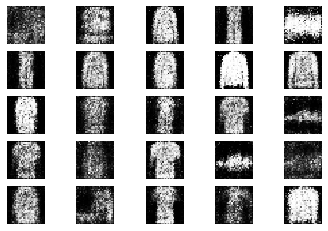

2051 [D loss: 0.685457, acc.: 56.25%] [G loss: 0.856339]
2052 [D loss: 0.616116, acc.: 64.06%] [G loss: 0.942232]
2053 [D loss: 0.657470, acc.: 60.94%] [G loss: 0.912656]
2054 [D loss: 0.637806, acc.: 64.06%] [G loss: 0.944705]
2055 [D loss: 0.618362, acc.: 65.62%] [G loss: 1.022914]
2056 [D loss: 0.604358, acc.: 67.19%] [G loss: 0.936854]
2057 [D loss: 0.605800, acc.: 68.75%] [G loss: 0.849159]
2058 [D loss: 0.568818, acc.: 73.44%] [G loss: 0.967916]
2059 [D loss: 0.607112, acc.: 68.75%] [G loss: 0.818961]
2060 [D loss: 0.770227, acc.: 51.56%] [G loss: 0.807327]
2061 [D loss: 0.652875, acc.: 57.81%] [G loss: 0.940020]
2062 [D loss: 0.617262, acc.: 59.38%] [G loss: 0.865139]
2063 [D loss: 0.593829, acc.: 67.19%] [G loss: 0.850924]
2064 [D loss: 0.640480, acc.: 64.06%] [G loss: 0.982961]
2065 [D loss: 0.569257, acc.: 70.31%] [G loss: 0.942917]
2066 [D loss: 0.599977, acc.: 68.75%] [G loss: 0.994283]
2067 [D loss: 0.604581, acc.: 68.75%] [G loss: 0.934585]
2068 [D loss: 0.608024, acc.: 7

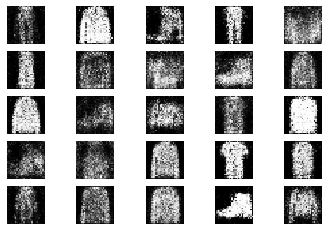

2101 [D loss: 0.605909, acc.: 60.94%] [G loss: 0.961365]
2102 [D loss: 0.574906, acc.: 70.31%] [G loss: 1.019855]
2103 [D loss: 0.610227, acc.: 62.50%] [G loss: 0.891919]
2104 [D loss: 0.641291, acc.: 64.06%] [G loss: 0.930164]
2105 [D loss: 0.623463, acc.: 65.62%] [G loss: 0.942973]
2106 [D loss: 0.614580, acc.: 67.19%] [G loss: 0.878633]
2107 [D loss: 0.679141, acc.: 60.94%] [G loss: 0.908736]
2108 [D loss: 0.608284, acc.: 65.62%] [G loss: 0.880905]
2109 [D loss: 0.654908, acc.: 54.69%] [G loss: 0.928183]
2110 [D loss: 0.632208, acc.: 59.38%] [G loss: 0.864494]
2111 [D loss: 0.585982, acc.: 70.31%] [G loss: 0.874104]
2112 [D loss: 0.633959, acc.: 62.50%] [G loss: 0.931999]
2113 [D loss: 0.533340, acc.: 78.12%] [G loss: 0.993060]
2114 [D loss: 0.634834, acc.: 60.94%] [G loss: 0.978140]
2115 [D loss: 0.601169, acc.: 73.44%] [G loss: 0.975827]
2116 [D loss: 0.599196, acc.: 65.62%] [G loss: 0.939089]
2117 [D loss: 0.586798, acc.: 71.88%] [G loss: 0.894896]
2118 [D loss: 0.628228, acc.: 7

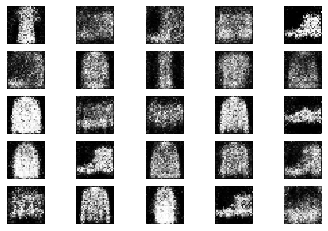

2151 [D loss: 0.687493, acc.: 57.81%] [G loss: 0.900022]
2152 [D loss: 0.596954, acc.: 62.50%] [G loss: 0.908089]
2153 [D loss: 0.590190, acc.: 70.31%] [G loss: 0.917682]
2154 [D loss: 0.622364, acc.: 62.50%] [G loss: 0.865744]
2155 [D loss: 0.658835, acc.: 59.38%] [G loss: 0.970606]
2156 [D loss: 0.623628, acc.: 62.50%] [G loss: 0.927600]
2157 [D loss: 0.649524, acc.: 70.31%] [G loss: 0.934761]
2158 [D loss: 0.675493, acc.: 56.25%] [G loss: 0.995308]
2159 [D loss: 0.618819, acc.: 62.50%] [G loss: 0.982567]
2160 [D loss: 0.645635, acc.: 68.75%] [G loss: 0.904552]
2161 [D loss: 0.663566, acc.: 62.50%] [G loss: 0.890391]
2162 [D loss: 0.572257, acc.: 71.88%] [G loss: 1.089106]
2163 [D loss: 0.670255, acc.: 56.25%] [G loss: 0.948535]
2164 [D loss: 0.655663, acc.: 59.38%] [G loss: 0.921616]
2165 [D loss: 0.675797, acc.: 54.69%] [G loss: 1.014041]
2166 [D loss: 0.673974, acc.: 57.81%] [G loss: 0.924349]
2167 [D loss: 0.638295, acc.: 57.81%] [G loss: 1.056974]
2168 [D loss: 0.562779, acc.: 7

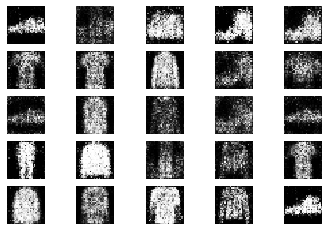

2201 [D loss: 0.609418, acc.: 68.75%] [G loss: 0.944545]
2202 [D loss: 0.576138, acc.: 75.00%] [G loss: 0.936275]
2203 [D loss: 0.645520, acc.: 67.19%] [G loss: 0.960323]
2204 [D loss: 0.640512, acc.: 64.06%] [G loss: 0.983133]
2205 [D loss: 0.622221, acc.: 68.75%] [G loss: 0.893045]
2206 [D loss: 0.666582, acc.: 62.50%] [G loss: 0.884016]
2207 [D loss: 0.662928, acc.: 59.38%] [G loss: 0.958985]
2208 [D loss: 0.571992, acc.: 73.44%] [G loss: 0.902549]
2209 [D loss: 0.699288, acc.: 53.12%] [G loss: 0.948647]
2210 [D loss: 0.644187, acc.: 67.19%] [G loss: 0.894101]
2211 [D loss: 0.622927, acc.: 64.06%] [G loss: 0.947042]
2212 [D loss: 0.587935, acc.: 62.50%] [G loss: 0.966605]
2213 [D loss: 0.632232, acc.: 62.50%] [G loss: 0.967603]
2214 [D loss: 0.582037, acc.: 71.88%] [G loss: 0.943800]
2215 [D loss: 0.679747, acc.: 59.38%] [G loss: 0.921018]
2216 [D loss: 0.539586, acc.: 73.44%] [G loss: 0.955553]
2217 [D loss: 0.702467, acc.: 57.81%] [G loss: 0.934531]
2218 [D loss: 0.658957, acc.: 5

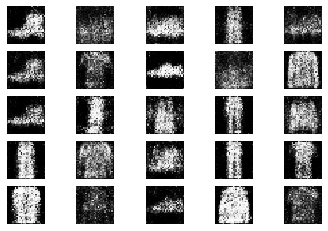

2251 [D loss: 0.616706, acc.: 65.62%] [G loss: 1.032606]
2252 [D loss: 0.580263, acc.: 70.31%] [G loss: 0.962343]
2253 [D loss: 0.655322, acc.: 59.38%] [G loss: 0.907924]
2254 [D loss: 0.541084, acc.: 75.00%] [G loss: 0.833897]
2255 [D loss: 0.602121, acc.: 65.62%] [G loss: 0.970224]
2256 [D loss: 0.534557, acc.: 71.88%] [G loss: 1.048580]
2257 [D loss: 0.650092, acc.: 67.19%] [G loss: 0.938925]
2258 [D loss: 0.585636, acc.: 78.12%] [G loss: 0.945130]
2259 [D loss: 0.566206, acc.: 68.75%] [G loss: 0.848739]
2260 [D loss: 0.614749, acc.: 59.38%] [G loss: 0.873440]
2261 [D loss: 0.651472, acc.: 53.12%] [G loss: 1.002788]
2262 [D loss: 0.631533, acc.: 64.06%] [G loss: 0.962067]
2263 [D loss: 0.595762, acc.: 75.00%] [G loss: 0.946292]
2264 [D loss: 0.638928, acc.: 68.75%] [G loss: 0.957541]
2265 [D loss: 0.586708, acc.: 70.31%] [G loss: 0.990839]
2266 [D loss: 0.639025, acc.: 60.94%] [G loss: 0.907488]
2267 [D loss: 0.642492, acc.: 68.75%] [G loss: 0.916653]
2268 [D loss: 0.631221, acc.: 6

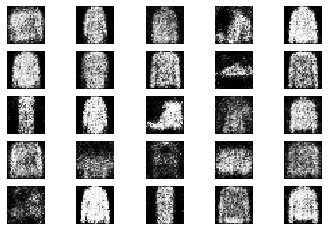

2301 [D loss: 0.619444, acc.: 67.19%] [G loss: 0.855602]
2302 [D loss: 0.550544, acc.: 78.12%] [G loss: 0.919774]
2303 [D loss: 0.649338, acc.: 57.81%] [G loss: 0.960070]
2304 [D loss: 0.591453, acc.: 71.88%] [G loss: 0.913068]
2305 [D loss: 0.577737, acc.: 70.31%] [G loss: 0.973159]
2306 [D loss: 0.579597, acc.: 68.75%] [G loss: 0.988966]
2307 [D loss: 0.658088, acc.: 57.81%] [G loss: 0.859519]
2308 [D loss: 0.551041, acc.: 73.44%] [G loss: 0.899438]
2309 [D loss: 0.623409, acc.: 60.94%] [G loss: 0.852885]
2310 [D loss: 0.563043, acc.: 71.88%] [G loss: 1.137148]
2311 [D loss: 0.587178, acc.: 62.50%] [G loss: 1.059333]
2312 [D loss: 0.631981, acc.: 62.50%] [G loss: 1.044064]
2313 [D loss: 0.658726, acc.: 62.50%] [G loss: 0.971155]
2314 [D loss: 0.637468, acc.: 68.75%] [G loss: 0.903917]
2315 [D loss: 0.589381, acc.: 70.31%] [G loss: 0.942593]
2316 [D loss: 0.605295, acc.: 71.88%] [G loss: 0.983373]
2317 [D loss: 0.655251, acc.: 68.75%] [G loss: 0.860252]
2318 [D loss: 0.660425, acc.: 5

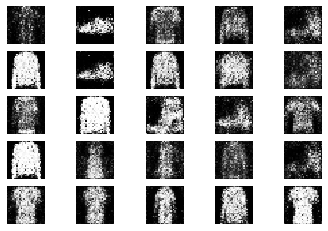

2351 [D loss: 0.602289, acc.: 71.88%] [G loss: 0.954324]
2352 [D loss: 0.592075, acc.: 68.75%] [G loss: 1.023544]
2353 [D loss: 0.575661, acc.: 75.00%] [G loss: 1.045575]
2354 [D loss: 0.627313, acc.: 59.38%] [G loss: 0.861298]
2355 [D loss: 0.621666, acc.: 60.94%] [G loss: 0.871207]
2356 [D loss: 0.599794, acc.: 62.50%] [G loss: 0.977175]
2357 [D loss: 0.687236, acc.: 57.81%] [G loss: 0.972251]
2358 [D loss: 0.654068, acc.: 62.50%] [G loss: 1.025704]
2359 [D loss: 0.593586, acc.: 75.00%] [G loss: 0.946742]
2360 [D loss: 0.640433, acc.: 59.38%] [G loss: 0.944733]
2361 [D loss: 0.618425, acc.: 60.94%] [G loss: 0.855811]
2362 [D loss: 0.703998, acc.: 53.12%] [G loss: 0.897037]
2363 [D loss: 0.700295, acc.: 50.00%] [G loss: 0.968574]
2364 [D loss: 0.551328, acc.: 81.25%] [G loss: 0.893982]
2365 [D loss: 0.650079, acc.: 57.81%] [G loss: 0.895339]
2366 [D loss: 0.596360, acc.: 67.19%] [G loss: 0.927835]
2367 [D loss: 0.614518, acc.: 60.94%] [G loss: 0.813127]
2368 [D loss: 0.573909, acc.: 6

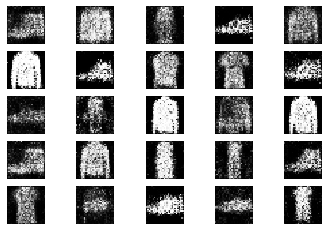

2401 [D loss: 0.591134, acc.: 68.75%] [G loss: 0.975164]
2402 [D loss: 0.688516, acc.: 59.38%] [G loss: 1.023972]
2403 [D loss: 0.589962, acc.: 68.75%] [G loss: 1.059833]
2404 [D loss: 0.622768, acc.: 65.62%] [G loss: 1.021093]
2405 [D loss: 0.671363, acc.: 48.44%] [G loss: 1.009724]
2406 [D loss: 0.566656, acc.: 67.19%] [G loss: 0.933584]
2407 [D loss: 0.599009, acc.: 64.06%] [G loss: 0.939872]
2408 [D loss: 0.589441, acc.: 67.19%] [G loss: 0.983295]
2409 [D loss: 0.656998, acc.: 57.81%] [G loss: 0.918112]
2410 [D loss: 0.570931, acc.: 68.75%] [G loss: 0.858343]
2411 [D loss: 0.582634, acc.: 65.62%] [G loss: 0.969662]
2412 [D loss: 0.668849, acc.: 59.38%] [G loss: 0.967746]
2413 [D loss: 0.604426, acc.: 65.62%] [G loss: 0.998529]
2414 [D loss: 0.701061, acc.: 50.00%] [G loss: 0.883834]
2415 [D loss: 0.671402, acc.: 51.56%] [G loss: 0.980470]
2416 [D loss: 0.501695, acc.: 79.69%] [G loss: 0.971881]
2417 [D loss: 0.703280, acc.: 59.38%] [G loss: 1.065129]
2418 [D loss: 0.565467, acc.: 7

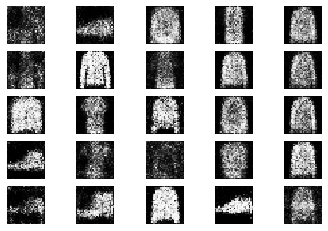

2451 [D loss: 0.566778, acc.: 70.31%] [G loss: 0.880787]
2452 [D loss: 0.605953, acc.: 68.75%] [G loss: 0.955243]
2453 [D loss: 0.654459, acc.: 60.94%] [G loss: 0.978609]
2454 [D loss: 0.648016, acc.: 57.81%] [G loss: 1.112847]
2455 [D loss: 0.563176, acc.: 78.12%] [G loss: 1.004639]
2456 [D loss: 0.670797, acc.: 54.69%] [G loss: 0.933423]
2457 [D loss: 0.589476, acc.: 67.19%] [G loss: 1.030304]
2458 [D loss: 0.592746, acc.: 67.19%] [G loss: 1.020349]
2459 [D loss: 0.550489, acc.: 81.25%] [G loss: 0.977722]
2460 [D loss: 0.630458, acc.: 62.50%] [G loss: 0.851203]
2461 [D loss: 0.666410, acc.: 48.44%] [G loss: 0.896975]
2462 [D loss: 0.599898, acc.: 68.75%] [G loss: 0.944158]
2463 [D loss: 0.615234, acc.: 62.50%] [G loss: 0.955921]
2464 [D loss: 0.609300, acc.: 64.06%] [G loss: 0.995737]
2465 [D loss: 0.548601, acc.: 68.75%] [G loss: 1.074608]
2466 [D loss: 0.629545, acc.: 62.50%] [G loss: 0.970057]
2467 [D loss: 0.699372, acc.: 53.12%] [G loss: 0.970262]
2468 [D loss: 0.637469, acc.: 6

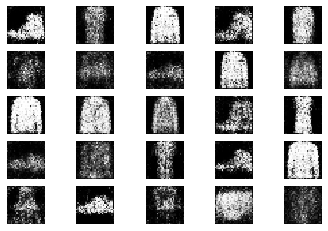

2501 [D loss: 0.640017, acc.: 62.50%] [G loss: 0.970022]
2502 [D loss: 0.596287, acc.: 71.88%] [G loss: 0.973714]
2503 [D loss: 0.627742, acc.: 64.06%] [G loss: 0.963363]
2504 [D loss: 0.606378, acc.: 60.94%] [G loss: 0.812298]
2505 [D loss: 0.597897, acc.: 62.50%] [G loss: 0.915098]
2506 [D loss: 0.584361, acc.: 70.31%] [G loss: 0.966663]
2507 [D loss: 0.604296, acc.: 71.88%] [G loss: 0.863378]
2508 [D loss: 0.691639, acc.: 59.38%] [G loss: 0.934615]
2509 [D loss: 0.663238, acc.: 62.50%] [G loss: 0.950217]
2510 [D loss: 0.693422, acc.: 56.25%] [G loss: 0.918094]
2511 [D loss: 0.581325, acc.: 65.62%] [G loss: 0.875861]
2512 [D loss: 0.530801, acc.: 81.25%] [G loss: 0.975228]
2513 [D loss: 0.592193, acc.: 68.75%] [G loss: 0.928335]
2514 [D loss: 0.643540, acc.: 59.38%] [G loss: 0.852517]
2515 [D loss: 0.640279, acc.: 62.50%] [G loss: 0.945194]
2516 [D loss: 0.627995, acc.: 65.62%] [G loss: 0.896772]
2517 [D loss: 0.617109, acc.: 59.38%] [G loss: 0.985215]
2518 [D loss: 0.585775, acc.: 7

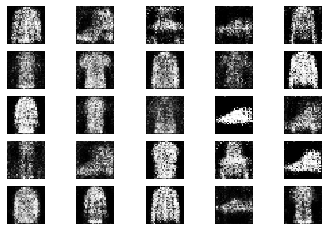

2551 [D loss: 0.613270, acc.: 70.31%] [G loss: 0.866028]
2552 [D loss: 0.585699, acc.: 68.75%] [G loss: 0.928776]
2553 [D loss: 0.630694, acc.: 51.56%] [G loss: 0.981424]
2554 [D loss: 0.656351, acc.: 57.81%] [G loss: 0.964065]
2555 [D loss: 0.566886, acc.: 67.19%] [G loss: 0.977824]
2556 [D loss: 0.621432, acc.: 68.75%] [G loss: 0.886202]
2557 [D loss: 0.619066, acc.: 60.94%] [G loss: 0.843835]
2558 [D loss: 0.647038, acc.: 56.25%] [G loss: 1.062209]
2559 [D loss: 0.552982, acc.: 78.12%] [G loss: 0.926803]
2560 [D loss: 0.684066, acc.: 62.50%] [G loss: 0.921010]
2561 [D loss: 0.674356, acc.: 53.12%] [G loss: 0.899541]
2562 [D loss: 0.628538, acc.: 62.50%] [G loss: 0.956835]
2563 [D loss: 0.678799, acc.: 64.06%] [G loss: 0.916356]
2564 [D loss: 0.622420, acc.: 59.38%] [G loss: 0.966610]
2565 [D loss: 0.602560, acc.: 71.88%] [G loss: 0.948146]
2566 [D loss: 0.695849, acc.: 54.69%] [G loss: 0.855913]
2567 [D loss: 0.611166, acc.: 68.75%] [G loss: 0.867327]
2568 [D loss: 0.604056, acc.: 6

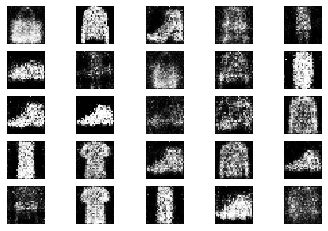

2601 [D loss: 0.624282, acc.: 65.62%] [G loss: 1.076001]
2602 [D loss: 0.663650, acc.: 57.81%] [G loss: 0.938558]
2603 [D loss: 0.679372, acc.: 56.25%] [G loss: 0.867802]
2604 [D loss: 0.592194, acc.: 67.19%] [G loss: 0.861596]
2605 [D loss: 0.670960, acc.: 57.81%] [G loss: 0.905645]
2606 [D loss: 0.598264, acc.: 71.88%] [G loss: 0.905915]
2607 [D loss: 0.651774, acc.: 57.81%] [G loss: 0.810197]
2608 [D loss: 0.689349, acc.: 53.12%] [G loss: 0.911870]
2609 [D loss: 0.574087, acc.: 71.88%] [G loss: 0.898716]
2610 [D loss: 0.659950, acc.: 60.94%] [G loss: 0.823530]
2611 [D loss: 0.515140, acc.: 79.69%] [G loss: 0.853843]
2612 [D loss: 0.660566, acc.: 65.62%] [G loss: 0.944708]
2613 [D loss: 0.654410, acc.: 65.62%] [G loss: 0.896290]
2614 [D loss: 0.664783, acc.: 60.94%] [G loss: 0.886750]
2615 [D loss: 0.615841, acc.: 68.75%] [G loss: 0.913220]
2616 [D loss: 0.586343, acc.: 67.19%] [G loss: 0.860291]
2617 [D loss: 0.618446, acc.: 60.94%] [G loss: 0.892350]
2618 [D loss: 0.607829, acc.: 6

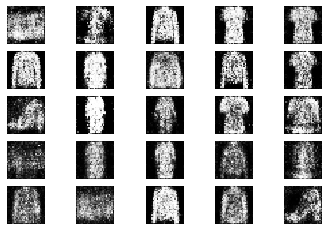

2651 [D loss: 0.606144, acc.: 68.75%] [G loss: 0.984194]
2652 [D loss: 0.654168, acc.: 62.50%] [G loss: 0.940359]
2653 [D loss: 0.641976, acc.: 59.38%] [G loss: 0.956478]
2654 [D loss: 0.601434, acc.: 64.06%] [G loss: 0.937792]
2655 [D loss: 0.609139, acc.: 62.50%] [G loss: 1.033201]
2656 [D loss: 0.650011, acc.: 57.81%] [G loss: 0.945269]
2657 [D loss: 0.589360, acc.: 70.31%] [G loss: 0.898482]
2658 [D loss: 0.665935, acc.: 60.94%] [G loss: 0.843623]
2659 [D loss: 0.594802, acc.: 71.88%] [G loss: 0.907749]
2660 [D loss: 0.676435, acc.: 53.12%] [G loss: 0.895795]
2661 [D loss: 0.608774, acc.: 70.31%] [G loss: 0.964166]
2662 [D loss: 0.618221, acc.: 68.75%] [G loss: 0.944340]
2663 [D loss: 0.595217, acc.: 70.31%] [G loss: 0.969628]
2664 [D loss: 0.643365, acc.: 57.81%] [G loss: 1.056799]
2665 [D loss: 0.583974, acc.: 65.62%] [G loss: 0.955830]
2666 [D loss: 0.635010, acc.: 57.81%] [G loss: 1.011452]
2667 [D loss: 0.620824, acc.: 60.94%] [G loss: 0.990229]
2668 [D loss: 0.648971, acc.: 6

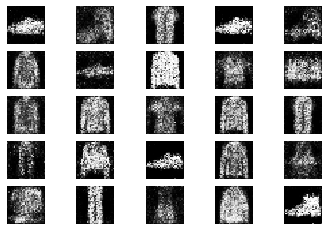

2701 [D loss: 0.673781, acc.: 60.94%] [G loss: 0.932014]
2702 [D loss: 0.623754, acc.: 73.44%] [G loss: 0.941208]
2703 [D loss: 0.619454, acc.: 65.62%] [G loss: 0.947156]
2704 [D loss: 0.608836, acc.: 68.75%] [G loss: 0.916499]
2705 [D loss: 0.655568, acc.: 62.50%] [G loss: 0.849747]
2706 [D loss: 0.685910, acc.: 53.12%] [G loss: 0.832911]
2707 [D loss: 0.603945, acc.: 70.31%] [G loss: 0.881559]
2708 [D loss: 0.683519, acc.: 51.56%] [G loss: 0.971017]
2709 [D loss: 0.561247, acc.: 78.12%] [G loss: 1.039687]
2710 [D loss: 0.608871, acc.: 68.75%] [G loss: 0.973616]
2711 [D loss: 0.621234, acc.: 59.38%] [G loss: 0.916216]
2712 [D loss: 0.647277, acc.: 64.06%] [G loss: 0.901993]
2713 [D loss: 0.630672, acc.: 68.75%] [G loss: 0.899362]
2714 [D loss: 0.659444, acc.: 57.81%] [G loss: 0.968983]
2715 [D loss: 0.538377, acc.: 76.56%] [G loss: 0.944562]
2716 [D loss: 0.607628, acc.: 65.62%] [G loss: 1.089783]
2717 [D loss: 0.611890, acc.: 67.19%] [G loss: 0.985643]
2718 [D loss: 0.690885, acc.: 5

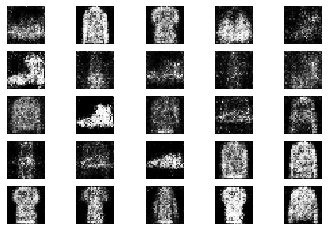

2751 [D loss: 0.587030, acc.: 65.62%] [G loss: 1.016114]
2752 [D loss: 0.689045, acc.: 53.12%] [G loss: 0.827802]
2753 [D loss: 0.616671, acc.: 60.94%] [G loss: 0.893817]
2754 [D loss: 0.585135, acc.: 73.44%] [G loss: 0.904122]
2755 [D loss: 0.695970, acc.: 60.94%] [G loss: 0.911380]
2756 [D loss: 0.642866, acc.: 60.94%] [G loss: 0.881600]
2757 [D loss: 0.553514, acc.: 71.88%] [G loss: 0.830690]
2758 [D loss: 0.625490, acc.: 64.06%] [G loss: 1.051374]
2759 [D loss: 0.715099, acc.: 57.81%] [G loss: 1.001625]
2760 [D loss: 0.637195, acc.: 54.69%] [G loss: 0.947566]
2761 [D loss: 0.688438, acc.: 64.06%] [G loss: 0.974199]
2762 [D loss: 0.610070, acc.: 68.75%] [G loss: 0.884062]
2763 [D loss: 0.597269, acc.: 67.19%] [G loss: 0.953464]
2764 [D loss: 0.640219, acc.: 60.94%] [G loss: 0.927372]
2765 [D loss: 0.580141, acc.: 60.94%] [G loss: 0.988000]
2766 [D loss: 0.703671, acc.: 54.69%] [G loss: 0.953789]
2767 [D loss: 0.658831, acc.: 51.56%] [G loss: 0.877732]
2768 [D loss: 0.593677, acc.: 7

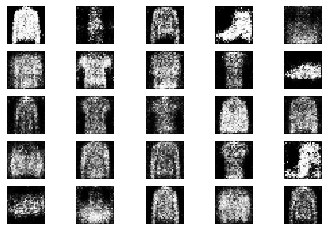

2801 [D loss: 0.605417, acc.: 71.88%] [G loss: 0.969587]
2802 [D loss: 0.562594, acc.: 73.44%] [G loss: 0.817520]
2803 [D loss: 0.657464, acc.: 60.94%] [G loss: 0.930306]
2804 [D loss: 0.627872, acc.: 68.75%] [G loss: 0.918666]
2805 [D loss: 0.546927, acc.: 75.00%] [G loss: 0.987052]
2806 [D loss: 0.573848, acc.: 62.50%] [G loss: 1.032525]
2807 [D loss: 0.681973, acc.: 59.38%] [G loss: 1.038079]
2808 [D loss: 0.609943, acc.: 68.75%] [G loss: 0.977647]
2809 [D loss: 0.633569, acc.: 65.62%] [G loss: 0.936126]
2810 [D loss: 0.663808, acc.: 57.81%] [G loss: 0.952218]
2811 [D loss: 0.570532, acc.: 71.88%] [G loss: 0.911067]
2812 [D loss: 0.608732, acc.: 70.31%] [G loss: 0.883813]
2813 [D loss: 0.571466, acc.: 71.88%] [G loss: 0.885670]
2814 [D loss: 0.544838, acc.: 73.44%] [G loss: 0.875301]
2815 [D loss: 0.572682, acc.: 68.75%] [G loss: 0.960205]
2816 [D loss: 0.582956, acc.: 73.44%] [G loss: 0.884173]
2817 [D loss: 0.634444, acc.: 64.06%] [G loss: 0.923229]
2818 [D loss: 0.641915, acc.: 6

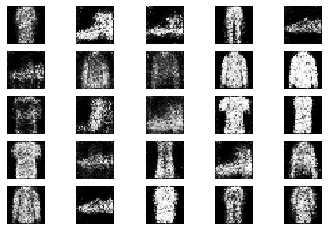

2851 [D loss: 0.645332, acc.: 64.06%] [G loss: 1.005979]
2852 [D loss: 0.677450, acc.: 59.38%] [G loss: 0.994282]
2853 [D loss: 0.635357, acc.: 67.19%] [G loss: 0.916618]
2854 [D loss: 0.577065, acc.: 68.75%] [G loss: 0.944413]
2855 [D loss: 0.582897, acc.: 70.31%] [G loss: 0.953316]
2856 [D loss: 0.612975, acc.: 73.44%] [G loss: 1.023491]
2857 [D loss: 0.621243, acc.: 71.88%] [G loss: 0.990483]
2858 [D loss: 0.612245, acc.: 62.50%] [G loss: 0.988968]
2859 [D loss: 0.675809, acc.: 64.06%] [G loss: 0.951488]
2860 [D loss: 0.648855, acc.: 60.94%] [G loss: 0.892554]
2861 [D loss: 0.710874, acc.: 54.69%] [G loss: 0.965312]
2862 [D loss: 0.649977, acc.: 62.50%] [G loss: 0.924710]
2863 [D loss: 0.688855, acc.: 54.69%] [G loss: 0.896132]
2864 [D loss: 0.621015, acc.: 65.62%] [G loss: 0.860509]
2865 [D loss: 0.687613, acc.: 62.50%] [G loss: 0.830719]
2866 [D loss: 0.620880, acc.: 62.50%] [G loss: 0.841896]
2867 [D loss: 0.658555, acc.: 57.81%] [G loss: 0.893998]
2868 [D loss: 0.583898, acc.: 6

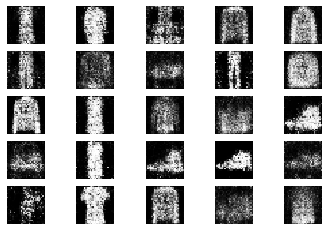

2901 [D loss: 0.612255, acc.: 70.31%] [G loss: 0.914766]
2902 [D loss: 0.655285, acc.: 57.81%] [G loss: 0.941642]
2903 [D loss: 0.599477, acc.: 68.75%] [G loss: 0.954485]
2904 [D loss: 0.608212, acc.: 75.00%] [G loss: 0.966075]
2905 [D loss: 0.680005, acc.: 60.94%] [G loss: 0.925094]
2906 [D loss: 0.626873, acc.: 57.81%] [G loss: 1.003351]
2907 [D loss: 0.625158, acc.: 60.94%] [G loss: 0.950252]
2908 [D loss: 0.625955, acc.: 68.75%] [G loss: 0.926929]
2909 [D loss: 0.683146, acc.: 51.56%] [G loss: 0.937255]
2910 [D loss: 0.644451, acc.: 67.19%] [G loss: 0.936324]
2911 [D loss: 0.575608, acc.: 67.19%] [G loss: 0.916148]
2912 [D loss: 0.608399, acc.: 62.50%] [G loss: 0.927613]
2913 [D loss: 0.624564, acc.: 64.06%] [G loss: 0.969864]
2914 [D loss: 0.632906, acc.: 64.06%] [G loss: 0.955500]
2915 [D loss: 0.712118, acc.: 51.56%] [G loss: 0.886243]
2916 [D loss: 0.610751, acc.: 62.50%] [G loss: 0.933705]
2917 [D loss: 0.700155, acc.: 56.25%] [G loss: 0.916182]
2918 [D loss: 0.695399, acc.: 5

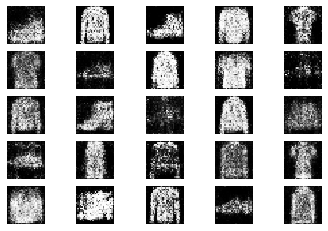

2951 [D loss: 0.683355, acc.: 60.94%] [G loss: 1.079930]
2952 [D loss: 0.633042, acc.: 68.75%] [G loss: 0.993176]
2953 [D loss: 0.679768, acc.: 53.12%] [G loss: 0.961255]
2954 [D loss: 0.589830, acc.: 67.19%] [G loss: 0.967978]
2955 [D loss: 0.678642, acc.: 56.25%] [G loss: 0.890781]
2956 [D loss: 0.586051, acc.: 76.56%] [G loss: 0.979889]
2957 [D loss: 0.610925, acc.: 70.31%] [G loss: 0.945474]
2958 [D loss: 0.683381, acc.: 56.25%] [G loss: 0.948677]
2959 [D loss: 0.617007, acc.: 64.06%] [G loss: 0.933159]
2960 [D loss: 0.630397, acc.: 64.06%] [G loss: 0.902479]
2961 [D loss: 0.579662, acc.: 75.00%] [G loss: 0.936020]
2962 [D loss: 0.580825, acc.: 73.44%] [G loss: 0.889052]
2963 [D loss: 0.619191, acc.: 70.31%] [G loss: 0.842287]
2964 [D loss: 0.609023, acc.: 65.62%] [G loss: 0.942331]
2965 [D loss: 0.654754, acc.: 60.94%] [G loss: 0.907057]
2966 [D loss: 0.603410, acc.: 70.31%] [G loss: 0.827710]
2967 [D loss: 0.637116, acc.: 60.94%] [G loss: 0.853925]
2968 [D loss: 0.609066, acc.: 7

In [22]:
#Training model:
epochs = 3000

batch_size = 32
valid = np.ones((batch_size, 1))
fake = np.zeros((batch_size, 1))

for epoch in range(epochs):
    # Train discriminator
    idx = np.random.randint(0, x_train.shape[0], batch_size)
    imgs = x_train[idx]
    noise = np.random.normal(0, 1, (batch_size, 100))
    gen_imgs = generator.predict(noise)
    d_loss_real = discriminator.train_on_batch(imgs, valid)
    d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
    d_loss = 0.5*np.add(d_loss_real, d_loss_fake)
    # Train generator
    noise = np.random.normal(0, 1, (batch_size, 100))
    g_loss = combined.train_on_batch(noise, valid)
    print("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))
    if epoch % 50 == 0:
        sample_images(epoch)

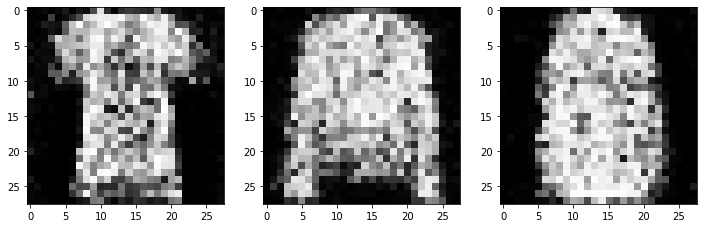

In [23]:
r, c = 5, 5
noise = np.random.normal(0, 1, (r*c, 100))
gen_imgs = generator.predict(noise)

gen_imgs = 0.5*gen_imgs+0.5

plt.figure(figsize=(12, 60))
plt.subplot(931)
plt.imshow(gen_imgs[0, :, :, 0], cmap='gray')
plt.subplot(932)
plt.imshow(gen_imgs[1, :, :, 0], cmap='gray')
plt.subplot(933)
plt.imshow(gen_imgs[2, :, :, 0], cmap='gray')
plt.show()
plt.close()